In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive
!rm -rf MVTSF
!unzip MVTSF.zip
%cd /content/drive/MyDrive/MVTSF
!ls

Mounted at /content/drive
/content/drive/MyDrive
Archive:  MVTSF.zip
   creating: MVTSF/
  inflating: MVTSF/anomaly.csv       
  inflating: MVTSF/anomaly_detected_regions.csv  
  inflating: MVTSF/ltshiftby1.csv    
  inflating: MVTSF/rtshiftby1.csv    
  inflating: MVTSF/rtshiftby2.csv    
  inflating: MVTSF/rtshiftby3.csv    
  inflating: MVTSF/shiftby1.csv      
  inflating: MVTSF/shiftby2.csv      
  inflating: MVTSF/shiftby3.csv      
  inflating: MVTSF/shiftby4.csv      
  inflating: MVTSF/shiftby6.csv      
  inflating: MVTSF/shiftby7.csv      
  inflating: MVTSF/sub.csv           
  inflating: MVTSF/submission.csv    
  inflating: MVTSF/sub_1.csv         
  inflating: MVTSF/sub_1_mod.csv     
  inflating: MVTSF/sub_2.csv         
  inflating: MVTSF/sub_2_mod.csv     
  inflating: MVTSF/sub_3.csv         
  inflating: MVTSF/sub_4.csv         
  inflating: MVTSF/sub_4_mod.csv     
  inflating: MVTSF/sub_5.csv         
  inflating: MVTSF/sub_5_mod.csv     
  inflating: MVTSF/sub_6.

In [2]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 6.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from feature_engine.transformation import LogTransformer,ReciprocalTransformer
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
np.random.seed(123)

In [6]:
pd.set_option('display.max_columns',1000)

In [7]:
df=pd.read_csv("Train Set - Train Set.csv")
df.head()

,Region_Name,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,Month 10,Month 11,Month 12,Month 13,Month 14,Month 15,Month 16,Month 17,Month 18,Month 19,Month 20,Month 21,Month 22,Month 23,Month 24,Month 25,Month 26,Month 27,Month 28,Month 29,Month 30,Month 31,Month 32,Month 33,Month 34,Month 35,Month 36,Month 37,Month 38,Month 39,Month 40,Month 41,Month 42,Month 43,Month 44,Month 45,Month 46,Month 47,Month 48,Month 49,Month 50,Month 51,Month 52,Month 53,Month 54,Month 55,Month 56,Month 57,Month 58,Month 59,Month 60,Month 61,Month 62,Month 63,Month 64,Month 65,Month 66,Month 67,Month 68,Month 69,Month 70,Month 71,Month 72
0,Region 1,0.154325,0.122901,0.127583,0.501557,0.103551,0.051983,0.140272,0.157586,0.182546,0.181801,-0.013496,0.213958,0.202585,0.256381,0.327656,0.277944,0.200623,0.141673,0.133457,0.092708,0.124225,0.199409,0.211584,0.256088,0.046845,0.050224,0.044738,0.049602,0.185713,0.141933,0.032244,0.101614,0.202953,0.185604,0.083222,0.097904,0.241120,0.264636,0.253286,0.422999,0.464442,0.316720,0.224314,0.338289,0.378352,0.520046,0.391280,0.314726,0.270200,0.362765,0.376728,0.394986,0.347692,0.351117,0.375120,0.289649,0.372379,0.398122,0.362610,0.263766,0.275622,0.252173,0.336913,0.321828,0.321895,0.337018,0.121581,0.234171,0.294693,0.373754,0.333642,0.242176
1,Region 2,0.119708,0.119831,0.112970,0.326049,0.098852,0.041502,0.116759,0.136964,0.178476,0.162621,-0.017723,0.227958,0.181563,0.247475,0.488062,0.290772,0.196146,0.139117,0.108014,0.091059,0.122529,0.202530,0.206454,0.243916,0.030216,0.057625,0.037567,0.047221,0.175260,0.121241,-0.009893,0.066981,0.191505,0.170095,0.057635,0.075968,0.216270,0.233841,0.245432,0.407445,0.437820,0.332397,0.238877,0.318503,0.366288,0.502219,0.360538,0.294045,0.241370,0.334915,0.359444,0.378980,0.306557,0.350775,0.342869,0.272034,0.344482,0.372061,0.318767,0.221102,0.221851,0.191496,0.283412,0.302669,0.306597,0.327412,0.124563,0.218367,0.275179,0.344997,0.300503,0.215147
2,Region 3,0.178236,0.165497,0.190754,0.321733,0.203126,0.048345,0.180064,0.176990,0.224173,0.223810,0.070306,0.314094,0.253627,0.317007,0.493548,0.356269,0.301312,0.295783,0.213944,0.225560,0.199628,0.295161,0.301142,0.369074,0.148873,0.148648,0.141286,0.176595,0.298081,0.247686,0.073358,0.167071,0.369198,0.273285,0.166522,0.232556,0.324115,0.337240,0.328820,0.488371,0.452943,0.299717,0.276886,0.353269,0.391376,0.575888,0.412834,0.404446,0.315161,0.413679,0.436428,0.452330,0.355533,0.397592,0.429922,0.315471,0.425693,0.437532,0.401876,0.320588,0.310557,0.285627,0.331988,0.377643,0.384990,0.362927,0.230516,0.263643,0.296751,0.400269,0.360406,0.335923
3,Region 4,0.225016,0.220602,0.224240,0.330916,0.268934,0.171322,0.243672,0.219831,0.242115,0.227575,0.068486,0.300100,0.260220,0.339176,0.408422,0.367631,0.374176,0.385319,0.200377,0.308989,0.264775,0.300382,0.328013,0.395487,0.204112,0.210327,0.230464,0.254440,0.428539,0.309254,0.155241,0.227263,0.471488,0.294128,0.162800,0.191990,0.303951,0.360914,0.397259,0.534679,0.493992,0.373266,0.296719,0.367477,0.400149,0.625336,0.415876,0.373174,0.305040,0.419634,0.408965,0.453475,0.325201,0.445034,0.414192,0.308857,0.381268,0.432136,0.366376,0.264211,0.271887,0.248869,0.315252,0.329762,0.352229,0.368514,0.192878,0.228902,0.291502,0.364874,0.311379,0.271102
4,Region 5,0.318976,0.316835,0.328486,0.483001,0.380898,0.292074,0.268395,0.326809,0.344086,0.278257,0.187874,0.588132,0.376303,0.429040,0.484136,0.547735,0.458580,0.588121,0.336758,0.398324,0.404609,0.351204,0.421711,0.620374,0.446481,0.354543,0.378399,0.423216,0.478113,0.386218,0.323202,0.331631,0.547656,0.383964,0.226795,0.392175,0.430364,0.439188,0.421460,0.672617,0.556797,0.527481,0.380318,0.429014,0.463007,0.671208,0.487795,0.500731,0.328601,0.450884,0.471953,0.506876,0.388457,0.417775,0.470368,0.363075,0.410614,0.482598,0.408525,0.381367,0.336923,0.288830,0.366314,0.392924,0.370159,0.422587,0.282631,0.289498,0.368923,0.416527,0.372523,0.392835


In [8]:
df_eda = df.copy()
df_eda = df_eda.set_index(keys='Region_Name', drop=False)
df_eda = df_eda.T
df_eda = df_eda.iloc[1:]
df_eda.head()

Region_Name,Region 1,Region 2,Region 3,Region 4,Region 5,Region 6,Region 7,Region 8,Region 9,Region 10,Region 11,Region 12,Region 13,Region 14,Region 15,Region 16,Region 17,Region 18,Region 19,Region 20,Region 21,Region 22,Region 23,Region 24,Region 25,Region 26,Region 27,Region 28,Region 29,Region 30,Region 31,Region 32,Region 33,Region 34,Region 35,Region 36,Region 37,Region 38,Region 39,Region 40,Region 41,Region 42,Region 43,Region 44,Region 45,Region 46,Region 47,Region 48,Region 49,Region 50,Region 51,Region 52,Region 53,Region 54,Region 55,Region 56,Region 57,Region 58,Region 59,Region 60,Region 61,Region 62,Region 63,Region 64,Region 65,Region 66,Region 67,Region 68,Region 69,Region 70,Region 71,Region 72,Region 73,Region 74,Region 75,Region 76,Region 77,Region 78,Region 79,Region 80,Region 81,Region 82,Region 83,Region 84,Region 85,Region 86,Region 87,Region 88,Region 89,Region 90,Region 91,Region 92,Region 93,Region 94,Region 95,Region 96,Region 97,Region 98,Region 99,Region 100,Region 101,Region 102,Region 103,Region 104,Region 105,Region 106,Region 107,Region 108,Region 109,Region 110,Region 111,Region 112,Region 113,Region 114,Region 115,Region 116,Region 117,Region 118,Region 119,Region 120,Region 121,Region 122,Region 123,Region 124,Region 125,Region 126,Region 127,Region 128,Region 129,Region 130,Region 131,Region 132,Region 133,Region 134,Region 135,Region 136,Region 137,Region 138,Region 139,Region 140,Region 141,Region 142,Region 143,Region 144,Region 145,Region 146,Region 147,Region 148,Region 149,Region 150,Region 151,Region 152,Region 153,Region 154,Region 155,Region 156,Region 157,Region 158,Region 159,Region 160,Region 161,Region 162,Region 163,Region 164,Region 165,Region 166,Region 167,Region 168,Region 169,Region 170,Region 171,Region 172,Region 173,Region 174,Region 175,Region 176,Region 177,Region 178,Region 179,Region 180,Region 181,Region 182,Region 183,Region 184,Region 185,Region 186,Region 187,Region 188,Region 189,Region 190,Region 191,Region 192,Region 193,Region 194,Region 195,Region 196,Region 197,Region 198,Region 199,Region 200,Region 201,Region 202,Region 203,Region 204,Region 205,Region 206,Region 207,Region 208,Region 209,Region 210,Region 211,Region 212,Region 213,Region 214,Region 215,Region 216,Region 217,Region 218,Region 219,Region 220,Region 221,Region 222,Region 223,Region 224,Region 225,Region 226,Region 227,Region 228,Region 229,Region 230,Region 231,Region 232,Region 233,Region 234,Region 235,Region 236,Region 237,Region 238,Region 239,Region 240,Region 241,Region 242,Region 243,Region 244,Region 245,Region 246,Region 247,Region 248,Region 249,Region 250,Region 251,Region 252,Region 253,Region 254,Region 255,Region 256,Region 257,Region 258,Region 259,Region 260,Region 261,Region 262,Region 263,Region 264,Region 265,Region 266,Region 267,Region 268,Region 269,Region 270,Region 271,Region 272,Region 273,Region 274,Region 275,Region 276,Region 277,Region 278,Region 279,Region 280,Region 281,Region 282,Region 283,Region 284,Region 285,Region 286,Region 287,Region 288,Region 289,Region 290,Region 291,Region 292,Region 293,Region 294,Region 295,Region 296,Region 297,Region 298,Region 299,Region 300,Region 301,Region 302,Region 303,Region 304,Region 305,Region 306,Region 307,Region 308,Region 309,Region 310,Region 311,Region 312,Region 313,Region 314,Region 315,Region 316,Region 317,Region 318,Region 319,Region 320,Region 321,Region 322,Region 323,Region 324,Region 325,Region 326,Region 327,Region 328,Region 329,Region 330,Region 331,Region 332,Region 333,Region 334,Region 335,Region 336,Region 337,Region 338,Region 339,Region 340,Region 341,Region 342,Region 343,Region 344,Region 345,Region 346,Region 347,Region 348,Region 349,Region 350,Region 351,Region 352,Region 353,Region 354,Region 355,Region 356,Region 357,Region 358,Region 359,Region 360,Region 361,Region 362,Region 363,Region 364,Region 365,Region 366,Region 367,Region 368,Region 369,Region 370,Region 371,Region 372,Regi

In [9]:
df_eda.isnull().mean()[df_eda.isnull().mean()!=0]

Series([], dtype: float64)

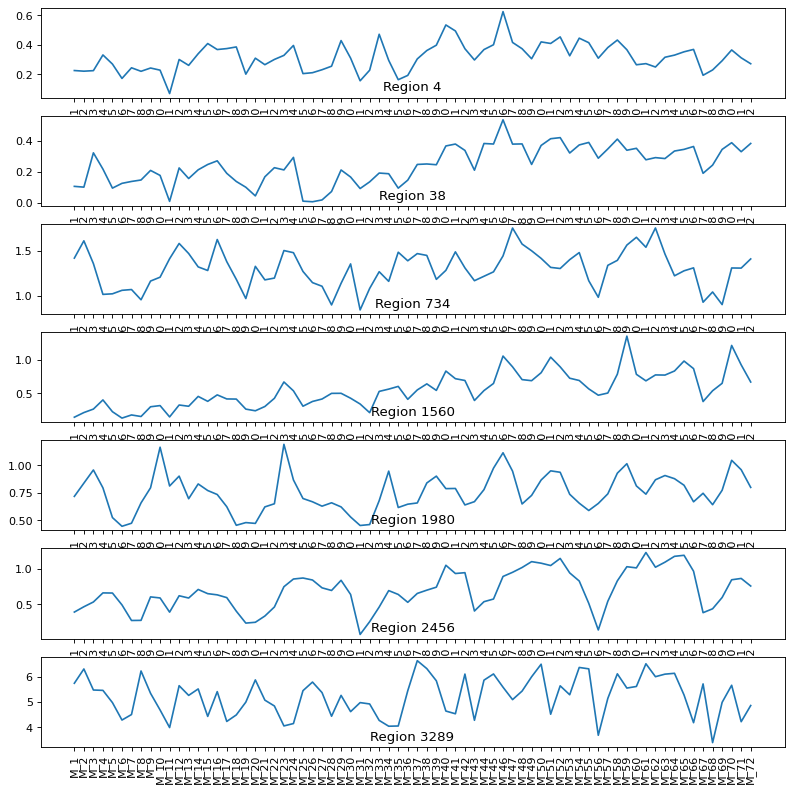

In [ ]:
def monthly_variation_72_months(region_list, df_func):
    plt.figure(figsize=(12, 12), dpi=80)
    for i in range(len(region_list)):
        plt.subplot(len(region_list), 1, i+1)
        name = region_list[i]
        plt.plot(df_func[name])
        xt = plt.xticks()
        new_t = []
        for t in xt[1]:
            new_t.append('M_'+t.get_text().split(' ')[-1])
        plt.xticks(xt[0], new_t);
        plt.title(name, y=0)
        plt.xticks(rotation=90);
    plt.show()

region_list = ['Region 4', 'Region 38','Region 734', 'Region 1560', 'Region 1980', 'Region 2456',
               'Region 3289']
monthly_variation_72_months(region_list, df_eda)

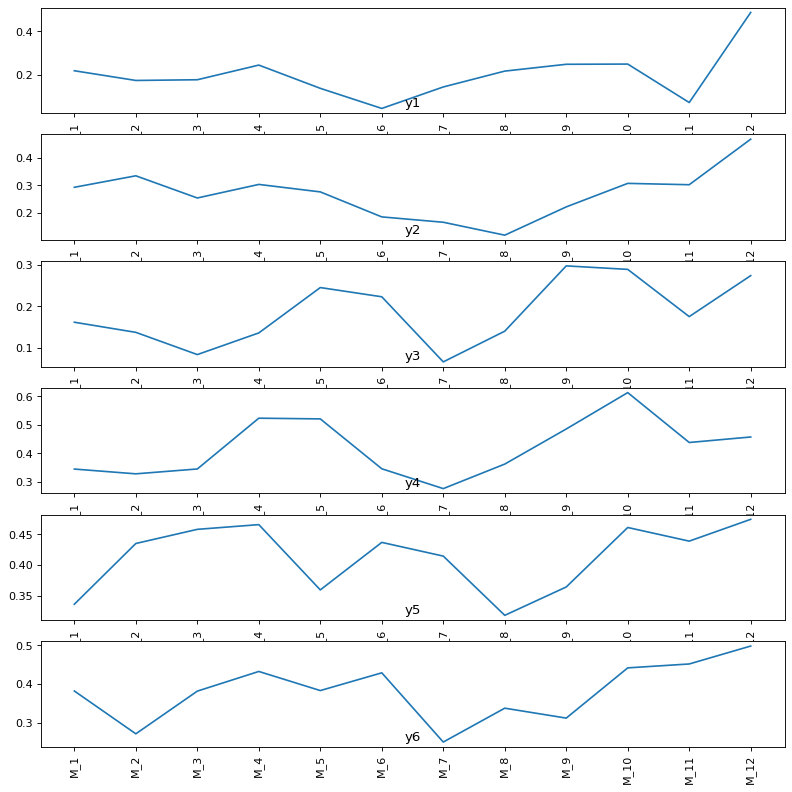

In [ ]:
#Region r year wise for 6 years
def region_year_wise(name_region):
    year_list = ['y1', 'y2', 'y3', 'y4', 'y5', 'y6']
    yr_list = []
    yearlist = []
    for j,i in enumerate(df_eda[name_region]):
        if (j+1)%12==0:
            yearlist.append(i)
            yr_list.append(yearlist)
            yearlist = []
        else:
            yearlist.append(i)
    df_region_1_yearwise = pd.DataFrame(yr_list).T
    df_region_1_yearwise.index = df_eda.index[:12]
    df_region_1_yearwise.columns = year_list

    plt.figure(figsize=(12, 12), dpi=80)
    for i in range(6):
        plt.subplot(6, 1, i+1)
        name = df_region_1_yearwise.columns[i]
        plt.plot(df_region_1_yearwise[name])
        xt = plt.xticks()
        new_t = []
        for t in xt[1]:
            new_t.append('M_'+t.get_text().split(' ')[-1])
        plt.xticks(xt[0], new_t);
        plt.title(name, y=0)
        plt.xticks(rotation=90);
    plt.show()

region_year_wise('Region 7')

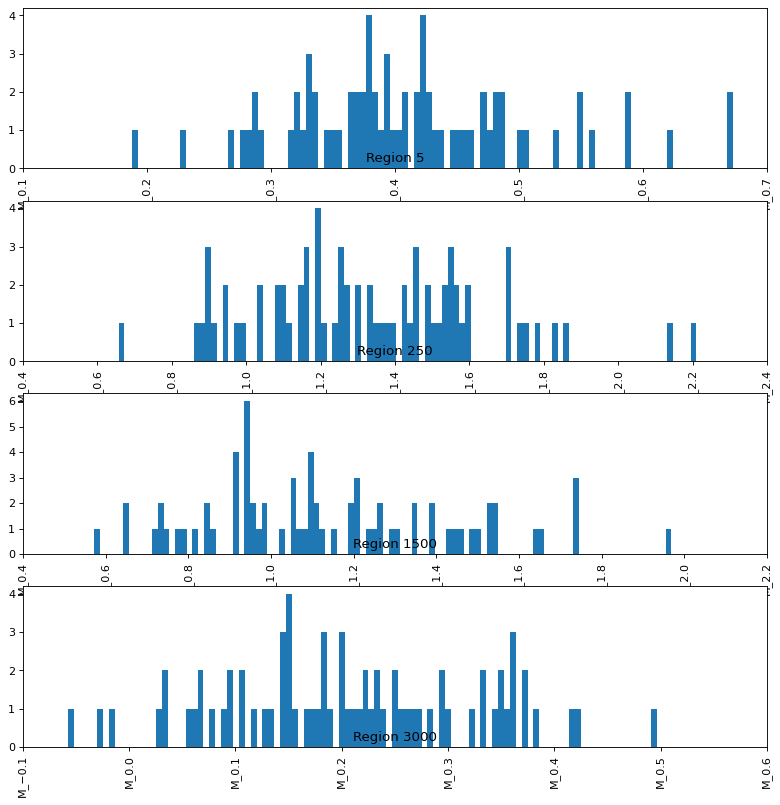

In [ ]:
def monthly_variation_72_months_hist(region_list, df_func):
    plt.figure(figsize=(12, 12), dpi=80)
    for i in range(len(region_list)):
        plt.subplot(len(region_list), 1, i+1)
        name = region_list[i]
        plt.hist(df_func[name], bins=100)
        xt = plt.xticks()
        new_t = []
        for t in xt[1]:
            new_t.append('M_'+t.get_text().split(' ')[-1])
        plt.xticks(xt[0], new_t);
        plt.title(name, y=0)
        plt.xticks(rotation=90);
    plt.show();

monthly_variation_72_months_hist(['Region 5', 'Region 250', 'Region 1500', 'Region 3000'], df_eda)

In [ ]:
def region_year_wise_corr(name_region, df_func):
    year_list = ['y1', 'y2', 'y3', 'y4', 'y5', 'y6']
    yr_list = []
    yearlist = []
    for j,i in enumerate(df_func[name_region]):
        if (j+1)%12==0:
            yearlist.append(i)
            yr_list.append(yearlist)
            yearlist = []
        else:
            yearlist.append(i)
    df_region_yearwise = pd.DataFrame(yr_list).T
    df_region_yearwise.index = df_eda.index[:12]
    df_region_yearwise.columns = year_list

    return df_region_yearwise, df_region_yearwise.corr()

region_year_wise_corr('Region 19', df_eda)[1]

,y1,y2,y3,y4,y5,y6
y1,1.000000,0.165410,0.455785,0.308394,0.219278,-0.062398
y2,0.165410,1.000000,0.149999,-0.152652,0.061127,0.073166
y3,0.455785,0.149999,1.000000,0.554182,-0.074137,0.490278
y4,0.308394,-0.152652,0.554182,1.000000,0.328364,0.648701
y5,0.219278,0.061127,-0.074137,0.328364,1.000000,0.452358
y6,-0.062398,0.073166,0.490278,0.648701,0.452358,1.000000


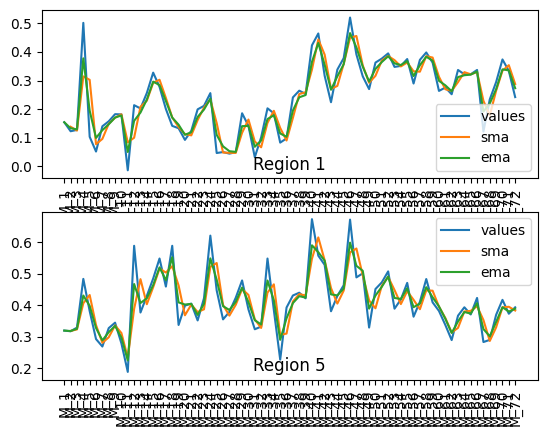

In [ ]:
def moving_averages(region_list, df_func, window_size):
    for i in range(len(region_list)):
        plt.subplot(len(region_list), 1, i+1)
        name = region_list[i]
        plt.plot(df_func[name], label='values')
        xt = plt.xticks()
        plt.plot(df_func[name].rolling(window=window_size).mean(), label='sma')
        plt.plot(df_func[name].ewm(span=window_size, adjust=False).mean(), label='ema')
        new_t = []
        for t in xt[1]:
            new_t.append('M_'+t.get_text().split(' ')[-1])
        plt.xticks(xt[0], new_t);
        plt.title(name, y=0)
        plt.xticks(rotation=90);
        plt.legend(loc='best')
    plt.show();

moving_averages(['Region 1', 'Region 5'], df_eda, 2)

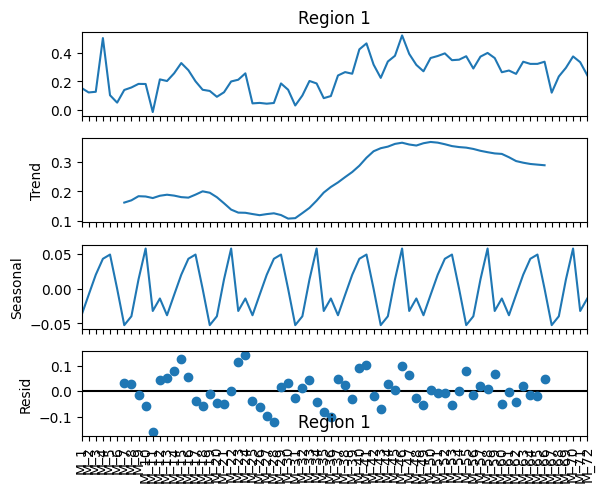

In [ ]:
def level_trend_seasonality_noise(name, df_func, m, p):
    result = seasonal_decompose(df_func[name], model=m, period=p)
    result.plot()
    xt = plt.xticks()
    new_t = []
    for t in xt[1]:
        new_t.append('M_'+t.get_text().split(' ')[-1])
    plt.xticks(xt[0], new_t);
    plt.title(name, y=0)
    plt.xticks(rotation=90);
    plt.show();

level_trend_seasonality_noise('Region 1', df_eda, 'additive', 12)

In [10]:
def region_wise_corr(name, df_func):
    df_func_corr = df_func.astype('float64')
    df_func_corr = df_func_corr.corr()
    df_func_corr_region = df_func_corr[name]
    df_func_corr_region = df_func_corr_region.reset_index(drop=False)
    df_func_corr_region.sort_values(by=name, ascending=False, inplace=True)
    df_func_corr_region.reset_index(drop=True, inplace=True)
    df_func_corr_region = df_func_corr_region[(df_func_corr_region[name]>=0.5)|(df_func_corr_region[name]<=-0.5)]
    return df_func_corr_region, list(df_func_corr_region['Region_Name'])

region_wise_corr('Region 5', df_eda)[0]

,Region_Name,Region 5
0,Region 5,1.000000
1,Region 4,0.830165
2,Region 3,0.690946
3,Region 18,0.683453
4,Region 12,0.662997
...,...,...
95,Region 1576,0.504011
96,Region 3076,0.503369
97,Region 37,0.502610
98,Region 1186,0.501244


In [ ]:
def describe_each_region(name, df_func):
    df_func_corr = df_func.astype('float64')
    df_describe = df_func_corr.describe()[name]
    return df_describe

describe_each_region('Region 1',df_eda)

count    72.000000
mean      0.240449
std       0.121758
min      -0.013496
25%       0.141323
50%       0.247175
75%       0.336939
max       0.520046
Name: Region 1, dtype: float64

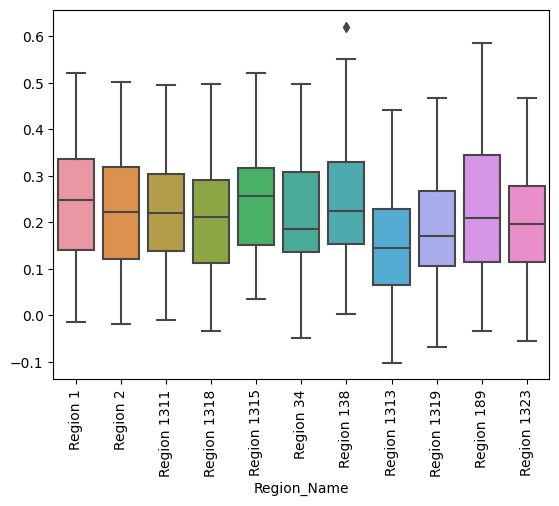

In [ ]:
def box_plot(name, df_func):
    sns.boxplot(df_func[region_wise_corr(name, df_eda)[1][:11]]); #[name]);
    xt = plt.xticks()
    new_t = []
    plt.xticks(xt[0], region_wise_corr(name, df_eda)[1][:11]); #[name]);
    plt.xticks(rotation=90);
    plt.show()

box_plot('Region 1', df_eda)

<ipython-input-18-2d0a417d4b0c>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_func[name], shade=True);


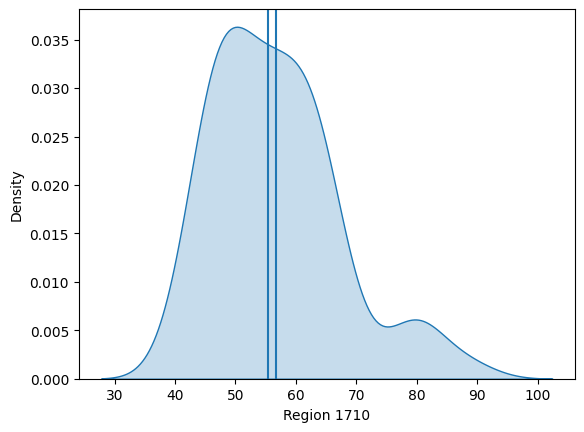

In [ ]:
def check_gaussian(name, df_func):
    sns.kdeplot(df_func[name], shade=True);
    plt.axvline(df_func[name].mean());
    plt.axvline(df_func[name].median());
    plt.plot();

check_gaussian('Region 1710', df_eda)

In [ ]:
def lag_plots(name, df_func, lag_val):
    lag = (df_func[name] - df_func[name].shift(lag_val)).fillna(df_func[name].iloc[:lag_val]).astype('float64')
    sns.jointplot(x=lag, y=df_func[name].astype('float64'), kind="reg", label=f'lag_{lag_val}');
    plt.legend(loc='best');
    plt.plot();

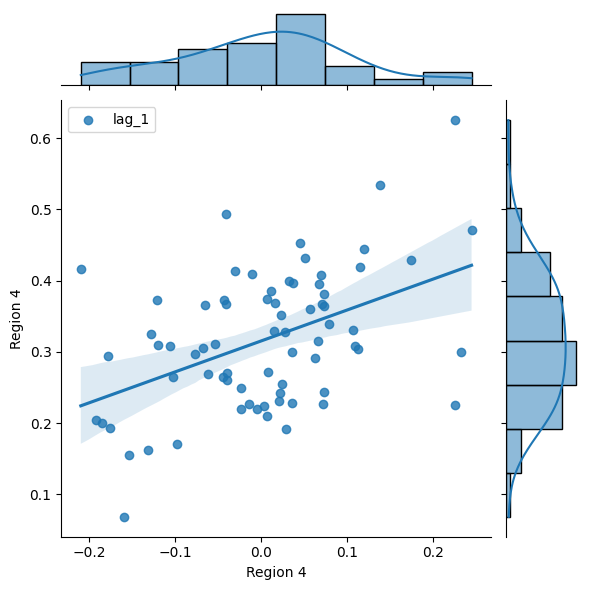

In [ ]:
lag_plots('Region 4', df_eda, 1)

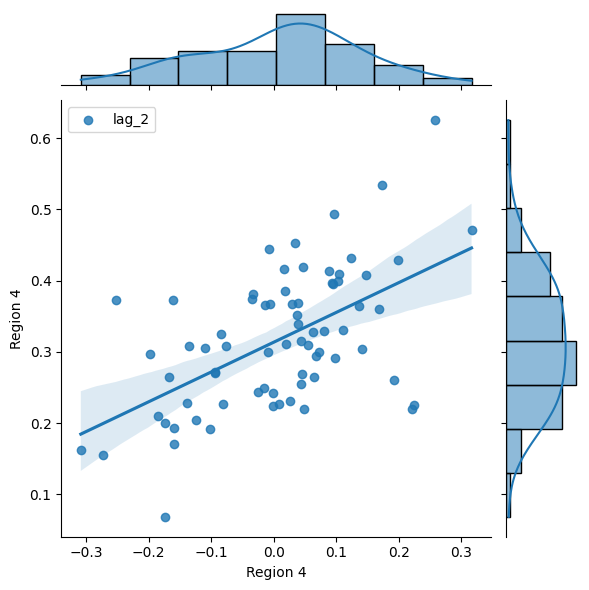

In [ ]:
lag_plots('Region 4', df_eda, 2)

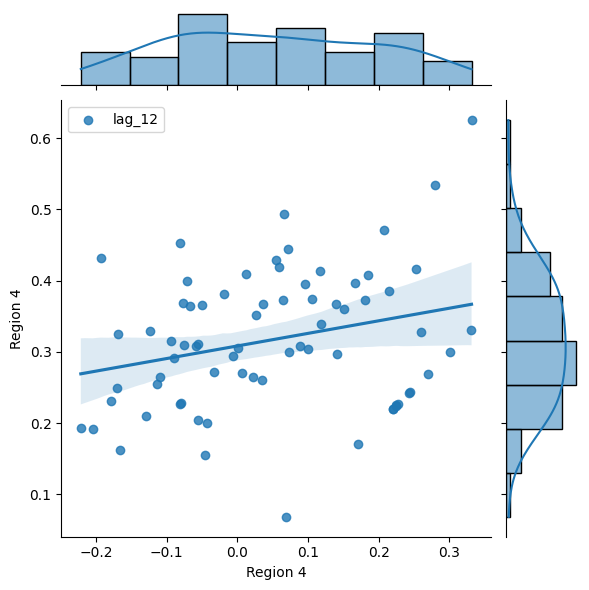

In [ ]:
lag_plots('Region 4', df_eda, 12)

In [ ]:
# prompt: autocorrelation plot in sns / plt

plt.acorr(df_eda['Region 4'], maxlags=12)
plt.show()


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
def autocorrelation_plots(name, df_func):
    pd.plotting.autocorrelation_plot(df_func[name]);
    plt.legend(loc='best');
    plt.plot();

def autocorrelation_plots_with_lag(name, df_func, lag_val):
    lag = (df_func[name] - df_func[name].shift(lag_val)).fillna(df_func[name].iloc[:lag_val]).astype('float64')
    pd.plotting.autocorrelation_plot(lag);
    plt.legend(loc='best');
    plt.plot();

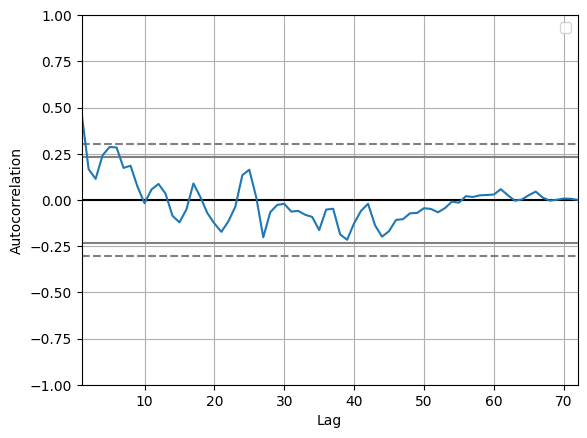

In [ ]:
autocorrelation_plots('Region 4', df_eda)

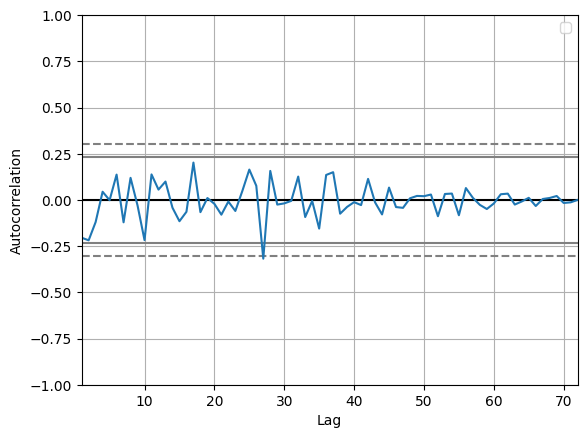

In [ ]:
autocorrelation_plots_with_lag('Region 4', df_eda, 1)

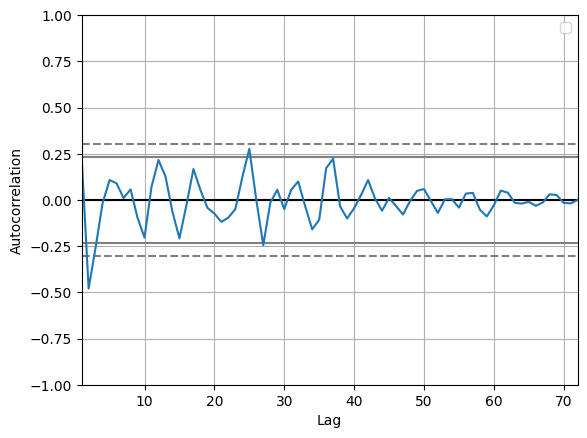

In [ ]:
autocorrelation_plots_with_lag('Region 4', df_eda, 2)

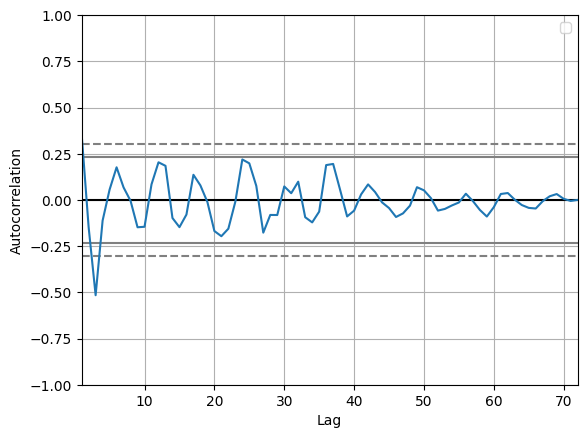

In [ ]:
autocorrelation_plots_with_lag('Region 4', df_eda, 3)

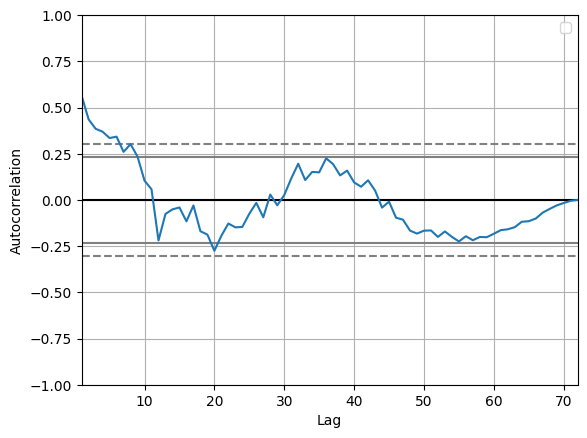

In [ ]:
autocorrelation_plots_with_lag('Region 4', df_eda, 12)

In [ ]:
l_max = []
l_min = []
l_mean = []
l_std = []
for name in df_eda.columns:
    l_max.append(df_eda[name].max())
    l_min.append(df_eda[name].min())
    l_mean.append(df_eda[name].mean())
    l_std.append(df_eda[name].std())

In [ ]:
df_des = pd.DataFrame([l_max, l_min, l_mean, l_std]).T
df_des.columns = ['MaxBP', 'MinBP', 'MeanBP', 'StdBP']
df_des.index = df_eda.columns
df_des.head()

,MaxBP,MinBP,MeanBP,StdBP
Region_Name,,,,
Region 1,0.520046,-0.013496,0.240449,0.121758
Region 2,0.502219,-0.017723,0.223226,0.118925
Region 3,0.575888,0.048345,0.300712,0.106930
Region 4,0.625336,0.068486,0.317086,0.096833
Region 5,0.672617,0.187874,0.410623,0.095624


In [ ]:
df_des.sort_values(by='MaxBP', ascending=False).head(7)

,MaxBP,MinBP,MeanBP,StdBP
Region_Name,,,,
Region 2181,249.296843,0.862956,47.829903,27.201973
Region 1090,157.012065,0.000000,88.201478,28.145226
Region 1098,147.800218,0.000000,82.651415,26.304489
Region 2843,140.971900,0.000000,33.309060,16.688695
Region 1092,140.122333,0.000000,81.743740,25.386290
Region 1094,138.753307,0.000000,80.841258,27.000693
Region 1709,121.252229,33.305162,52.601112,14.609889


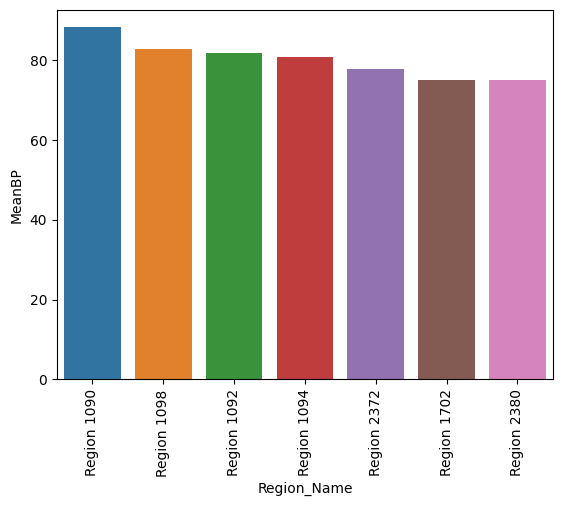

In [ ]:
sns.barplot(x=df_des.sort_values(by='MeanBP', ascending=False).head(7).index, y=df_des.sort_values(by='MeanBP', ascending=False).head(7)['MeanBP']);
plt.xticks(rotation=90);

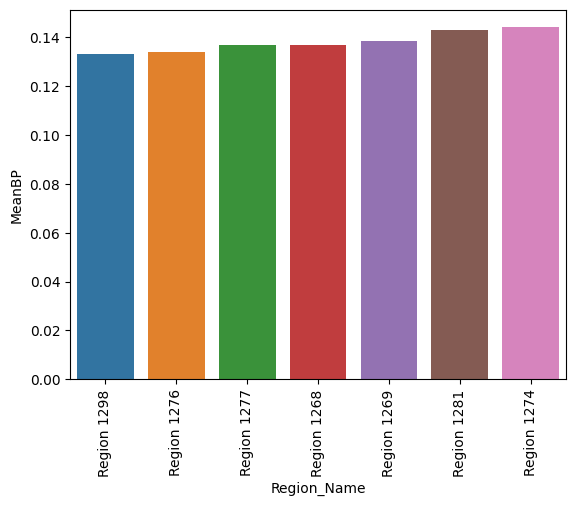

In [ ]:
sns.barplot(x=df_des.sort_values(by='MeanBP', ascending=True).head(7).index, y=df_des.sort_values(by='MeanBP', ascending=True).head(7)['MeanBP']);
plt.xticks(rotation=90);

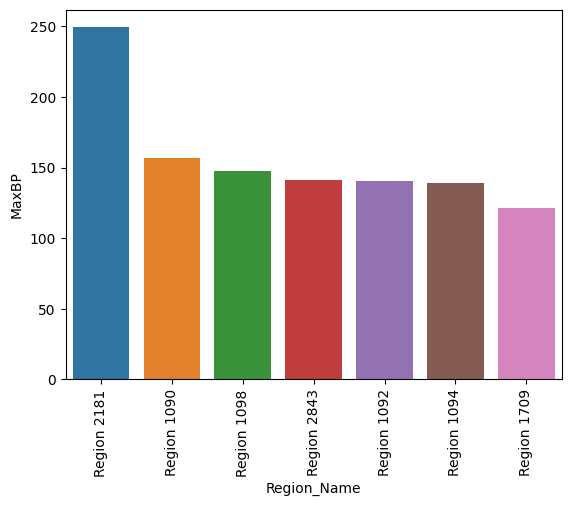

In [ ]:
sns.barplot(x=df_des.sort_values(by='MaxBP', ascending=False).head(7).index, y=df_des.sort_values(by='MaxBP', ascending=False).head(7)['MaxBP']);
plt.xticks(rotation=90);

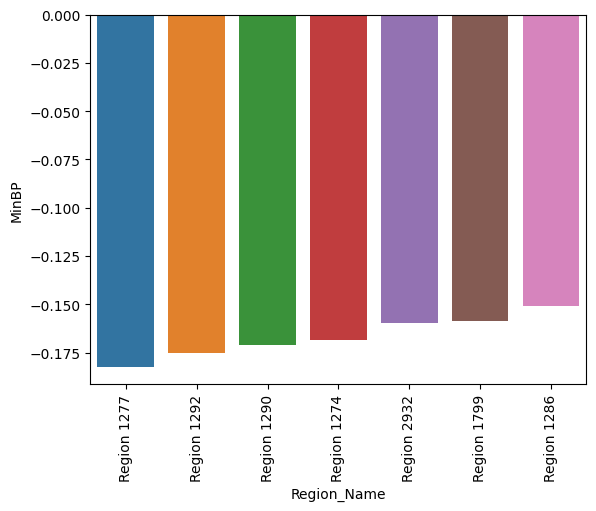

In [ ]:
sns.barplot(x=df_des.sort_values(by='MinBP', ascending=True).head(7).index, y=df_des.sort_values(by='MinBP', ascending=True).head(7)['MinBP']);
plt.xticks(rotation=90);

In [ ]:
dfs=pd.DataFrame(df_eda.stack(),columns=['num']).reset_index()
dfs.columns=['Months','Regions','BP']
dfs['Months_Num']=dfs['Months'].apply(lambda x:int(x.split(' ')[1]))
dfs['Months_Num']=dfs['Months_Num'].apply(lambda x:x%12).replace(0,12,regex=False)
dfs.head()

,Months,Regions,BP,Months_Num
0,Month 1,Region 1,0.154325,1
1,Month 1,Region 2,0.119708,1
2,Month 1,Region 3,0.178236,1
3,Month 1,Region 4,0.225016,1
4,Month 1,Region 5,0.318976,1


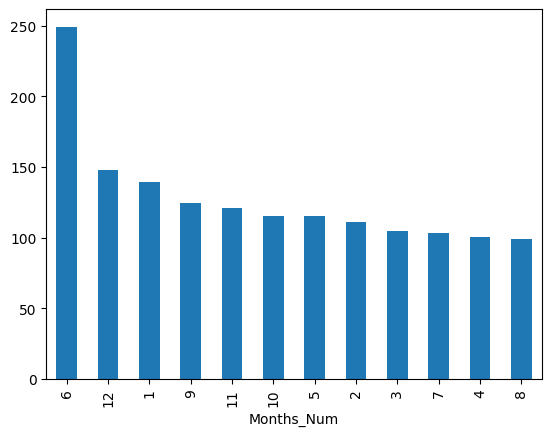

In [ ]:
dfs.groupby('Months_Num')['BP'].max().sort_values(ascending=False).plot(kind='bar');

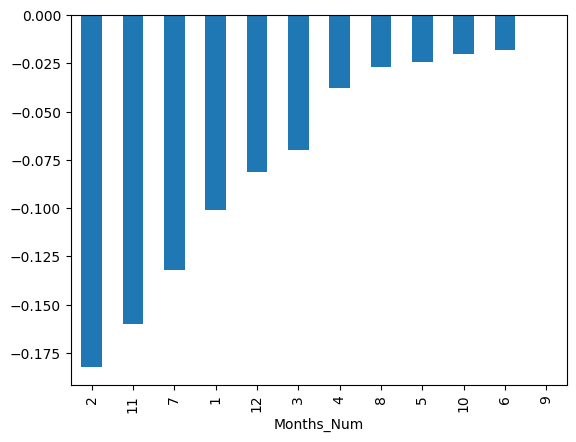

In [ ]:
dfs.groupby('Months_Num')['BP'].min().sort_values(ascending=True).plot(kind='bar');

In [11]:
def forecast(x_test_data, y_test_data, model=None, window_size=4):
    forecast_results = []
    for i in range(15):
        if i==0:
            atf = np.array([list(x_test_data[-1][1:]) + list([y_test_data[-1]])], dtype='float64')
            value = model.predict(atf)
            forecast_results.extend(list(value))
        else:
            atf = np.array([list(atf[0][1:]) + list(value)], dtype='float64')
            value = model.predict(atf)
            forecast_results.extend(list(value))
    return forecast_results

def plot_forecast(name, df_func, forecasts):
    total_val = list(df_func[name]) + list(forecasts)
    curr_ind = list(df_func.index)
    for t in range(73,88):
        curr_ind.append(f'Month {t}')
    sns.lineplot(x=curr_ind, y=total_val, label = 'Forecast');
    plt.plot(df_func[name], label='Actual');
    plt.legend(loc='best');
    xt = plt.xticks()
    new_t = []
    for t in xt[1]:
        new_t.append('M_'+t.get_text().split(' ')[-1])
    plt.xticks(xt[0], new_t);
    plt.title(name, y=0)
    plt.xticks(rotation=90);
    plt.show();

In [12]:
def split_dataset(data):
	train, test = data[:int(len(data)*0.8)+1], data[int(len(data)*0.8)+1:]
	return train, test

In [13]:
# ml models
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
#univariate

In [16]:
# lr = LinearRegression()
# fcl, sl = all_regions_uni(df_eda, lr, param_grid={}, ws=4)
# print(fcl.shape, len(sl))

In [17]:
relevant_df = df_eda[region_wise_corr('Region 1', df_eda)[1]]
uni_rel_df = relevant_df[relevant_df.columns[:1]]
uni_rel_df_train, uni_rel_df_test = split_dataset(uni_rel_df)
uni_rel_df.head()

Region_Name,Region 1
Month 1,0.154325
Month 2,0.122901
Month 3,0.127583
Month 4,0.501557
Month 5,0.103551


In [ ]:
relevant_df = df_eda[region_wise_corr('Region 1', df_eda)[1]]
uni_rel_df = relevant_df[relevant_df.columns[:1]]
uni_rel_df_train, uni_rel_df_test = split_dataset(uni_rel_df)
uni_rel_df.head()
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(uni_rel_df)

In [18]:
#scaling the dataset as dataset is not skewed
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(uni_rel_df)
#Creating a window for previous data
def to_supervised(train, window_size=4):
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])

  return X,Y

X, Y = to_supervised(scaled_dataset,window_size=12)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (60, 1)
X (60, 12, 1)


In [19]:
#Splitting the dataset
X_train, X_test = X[:int(len(X)*0.8)] , X[int(len(X)*0.8):]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[:int(len(X)*0.8)] , Y[int(len(X)*0.8):]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (48, 12, 1)
X_test (12, 12, 1)
Y_train (48, 1)
Y_test (12, 1)


In [ ]:
lr = LinearRegression()
lr.fit(X_train[:,:,0], Y_train[:,0])
mean_squared_error(Y_test[:,0], lr.predict(X_test[:,:,0]))

0.016279322194575865

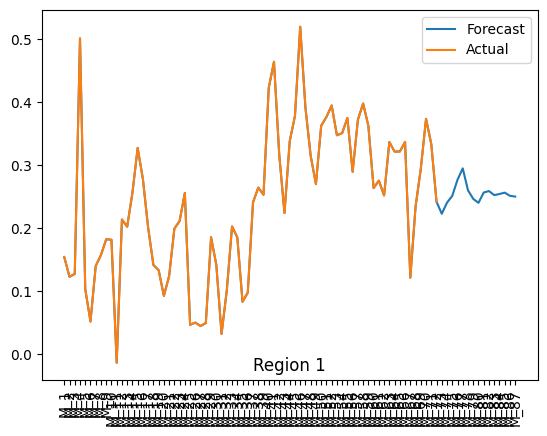

array([[0.22300327, 0.24068781, 0.25148516, 0.27705522, 0.29513311,
        0.26031193, 0.24669886, 0.24040642, 0.25679168, 0.25910749,
        0.25270211, 0.25440075, 0.25661208, 0.25153802, 0.25034984]])

In [ ]:
fr = scaler.inverse_transform([forecast(X_test[:,:,0], Y_test[:,0], lr, 12)])
plot_forecast('Region 1', df_eda, fr[0])
fr

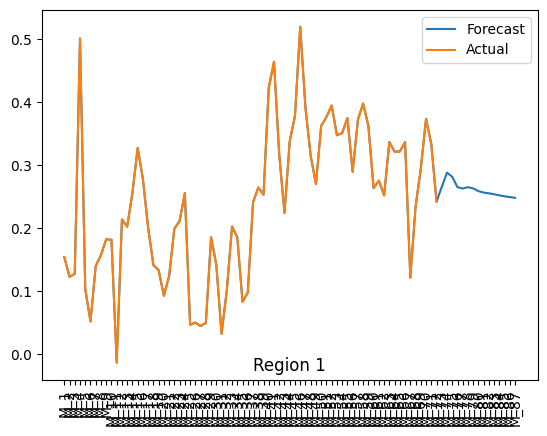

array([[0.2657467 , 0.28829808, 0.28165614, 0.26517924, 0.26316937,
        0.26528967, 0.26322216, 0.25899647, 0.25664374, 0.25551059,
        0.25402688, 0.25220807, 0.25068692, 0.24949593, 0.24837853]])

In [ ]:
fr = scaler.inverse_transform([forecast(X_test[:,:,0], Y_test[:,0], lr, 4)])
plot_forecast('Region 1', df_eda, fr[0])
fr

In [ ]:
lsr = Lasso()
param_grid = {'alpha':[0.005,0.004,0.003,0.0023,0.002,0.001,0.0005],'random_state':[0]}
grid = GridSearchCV(lsr, param_grid, scoring='neg_mean_squared_error', n_jobs=-1,
                    refit=True, cv=5, return_train_score=True)
grid.fit(X_train[:,:,0], Y_train[:,0])
grid_df = pd.DataFrame(grid.cv_results_)
grid_df = grid_df.sort_values(by='mean_test_score',ascending=False)
grid_df = grid_df.T
new_cols = []
for g in grid_df.columns:
    new_cols.append('A_'+str(g))
grid_df.columns = new_cols
grid.score(X_test[:,:,0], Y_test[:,0])*-1, grid_df.T.params

(0.016744032886820234,
 A_0     {'alpha': 0.005, 'random_state': 0}
 A_1     {'alpha': 0.004, 'random_state': 0}
 A_2     {'alpha': 0.003, 'random_state': 0}
 A_3    {'alpha': 0.0023, 'random_state': 0}
 A_4     {'alpha': 0.002, 'random_state': 0}
 A_5     {'alpha': 0.001, 'random_state': 0}
 A_6    {'alpha': 0.0005, 'random_state': 0}
 Name: params, dtype: object)

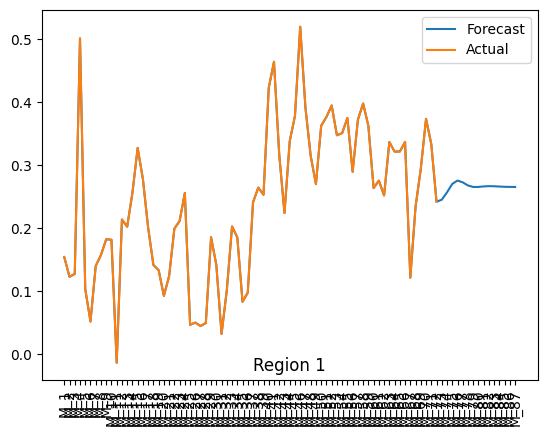

array([[0.24535922, 0.25708434, 0.27040479, 0.27579647, 0.27291222,
        0.26794327, 0.26558625, 0.26564136, 0.26647824, 0.26691936,
        0.26672378, 0.26625071, 0.26586951, 0.26568798, 0.26562717]])

In [ ]:
lsr = Lasso(**grid_df.T.params.iloc[0])
lsr.fit(X_train[:,:,0], Y_train[:,0])
fr = scaler.inverse_transform([forecast(X_test[:,:,0], Y_test[:,0], lsr, 12)])
plot_forecast('Region 1', df_eda, fr[0])
fr

In [ ]:
rr = Ridge()
param_grid = {} #'alpha':[0.16, 0.157, 0.156, 0.155, 0.15],'random_state':[0]}
grid = GridSearchCV(rr, param_grid, scoring='neg_mean_squared_error', n_jobs=-1,
                    refit=True, cv=5, return_train_score=True)
grid.fit(X_train[:,:,0], Y_train[:,0])
grid_df = pd.DataFrame(grid.cv_results_)
grid_df = grid_df.sort_values(by='mean_test_score',ascending=False)
grid_df = grid_df.T
new_cols = []
for g in grid_df.columns:
    new_cols.append('A_'+str(g))
grid_df.columns = new_cols
grid.score(X_test[:,:,0], Y_test[:,0])*-1, grid_df.T.params

(0.01408749916155422,
 A_0    {}
 Name: params, dtype: object)

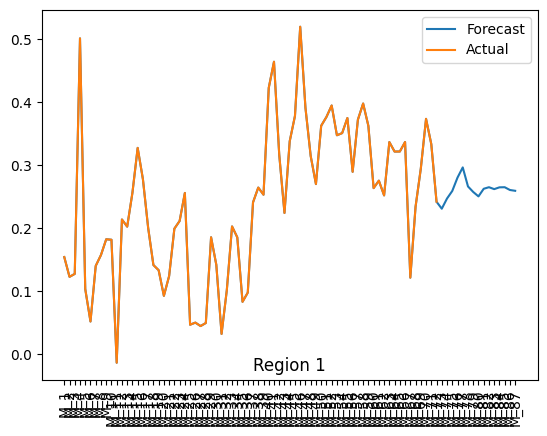

array([[0.23106785, 0.24724443, 0.25923405, 0.28044785, 0.2966644 ,
        0.26642378, 0.25763611, 0.25064051, 0.26274454, 0.26520127,
        0.2621806 , 0.26500841, 0.26520167, 0.26079066, 0.25951453]])

In [ ]:
rr = Ridge(**grid_df.T.params.iloc[0])
rr.fit(X_train[:,:,0], Y_train[:,0])
fr = scaler.inverse_transform([forecast(X_test[:,:,0], Y_test[:,0], rr, 12)])
plot_forecast('Region 1', df_eda, fr[0])
fr

In [ ]:
enr = ElasticNet()
param_grid = {'alpha':[0.01, 0.005, 0.001],'l1_ratio':[0.9,0.95,0.99,1.0], 'random_state':[0]}
grid = GridSearchCV(enr, param_grid, scoring='neg_mean_squared_error', n_jobs=-1,
                    refit=True, cv=5, return_train_score=True)
grid.fit(X_train[:,:,0], Y_train[:,0])
grid_df = pd.DataFrame(grid.cv_results_)
grid_df = grid_df.sort_values(by='mean_test_score',ascending=False)
grid_df = grid_df.T
new_cols = []
for g in grid_df.columns:
    new_cols.append('A_'+str(g))
grid_df.columns = new_cols
grid.score(X_test[:,:,0], Y_test[:,0])*-1, grid_df.T.params

(0.016744032886820234,
 A_7     {'alpha': 0.005, 'l1_ratio': 1.0, 'random_stat...
 A_6     {'alpha': 0.005, 'l1_ratio': 0.99, 'random_sta...
 A_5     {'alpha': 0.005, 'l1_ratio': 0.95, 'random_sta...
 A_4     {'alpha': 0.005, 'l1_ratio': 0.9, 'random_stat...
 A_11    {'alpha': 0.001, 'l1_ratio': 1.0, 'random_stat...
 A_10    {'alpha': 0.001, 'l1_ratio': 0.99, 'random_sta...
 A_9     {'alpha': 0.001, 'l1_ratio': 0.95, 'random_sta...
 A_8     {'alpha': 0.001, 'l1_ratio': 0.9, 'random_stat...
 A_0     {'alpha': 0.01, 'l1_ratio': 0.9, 'random_state...
 A_1     {'alpha': 0.01, 'l1_ratio': 0.95, 'random_stat...
 A_2     {'alpha': 0.01, 'l1_ratio': 0.99, 'random_stat...
 A_3     {'alpha': 0.01, 'l1_ratio': 1.0, 'random_state...
 Name: params, dtype: object)

In [ ]:
hbr = HuberRegressor()
param_grid = {'alpha':[1,0.9,0.5,0.1, 0.0001],'epsilon':[100,10,7,6,5.5,5, 1.35],'max_iter':[100,500,1000]}
grid = GridSearchCV(hbr, param_grid, scoring='neg_mean_squared_error', n_jobs=-1,
                    refit=True, cv=5, return_train_score=True)
grid.fit(X_train[:,:,0], Y_train[:,0])
grid_df = pd.DataFrame(grid.cv_results_)
grid_df = grid_df.sort_values(by='mean_test_score',ascending=False)
grid_df = grid_df.T
new_cols = []
for g in grid_df.columns:
    new_cols.append('A_'+str(g))
grid_df.columns = new_cols
grid.score(X_test[:,:,0], Y_test[:,0])*-1, grid_df.T.params

(0.014851140007455516,
 A_6            {'alpha': 1, 'epsilon': 7, 'max_iter': 100}
 A_7            {'alpha': 1, 'epsilon': 7, 'max_iter': 500}
 A_8           {'alpha': 1, 'epsilon': 7, 'max_iter': 1000}
 A_17          {'alpha': 1, 'epsilon': 5, 'max_iter': 1000}
 A_16           {'alpha': 1, 'epsilon': 5, 'max_iter': 500}
                                ...                        
 A_82      {'alpha': 0.1, 'epsilon': 1.35, 'max_iter': 500}
 A_81      {'alpha': 0.1, 'epsilon': 1.35, 'max_iter': 100}
 A_102    {'alpha': 0.0001, 'epsilon': 1.35, 'max_iter':...
 A_103    {'alpha': 0.0001, 'epsilon': 1.35, 'max_iter':...
 A_104    {'alpha': 0.0001, 'epsilon': 1.35, 'max_iter':...
 Name: params, Length: 105, dtype: object)

In [ ]:
svr = SVR()
param_grid = {}
grid = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', n_jobs=-1,
                    refit=True, cv=5, return_train_score=True)
grid.fit(X_train[:,:,0], Y_train[:,0])
grid_df = pd.DataFrame(grid.cv_results_)
grid_df = grid_df.sort_values(by='mean_test_score',ascending=False)
grid_df = grid_df.T
new_cols = []
for g in grid_df.columns:
    new_cols.append('A_'+str(g))
grid_df.columns = new_cols
grid.score(X_test[:,:,0], Y_test[:,0])*-1, grid_df.T.params

(0.014063838680477904,
 A_0    {}
 Name: params, dtype: object)

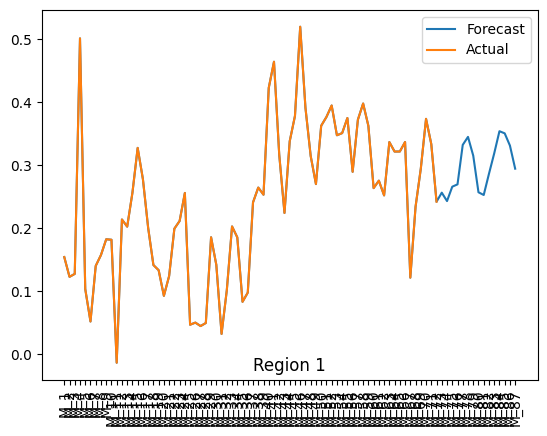

array([[0.25655643, 0.24319836, 0.26602858, 0.26972391, 0.33242401,
        0.34512149, 0.31538892, 0.25717712, 0.25284335, 0.28649278,
        0.31889509, 0.35414029, 0.3507671 , 0.33131529, 0.29461066]])

In [ ]:
sv = SVR()
sv.fit(X_train[:,:,0], Y_train[:,0])
fr = scaler.inverse_transform([forecast(X_test[:,:,0], Y_test[:,0], sv, 12)])
plot_forecast('Region 1', df_eda, fr[0])
fr

In [ ]:
mlpr = MLPRegressor()
param_grid = {'hidden_layer_sizes':[(7,), (32,), (64,), (100,), (128,), (256,), (512,)],
              'solver':['adam','sgd'], 'learning_rate':['constant', 'adaptive'], 'random_state':[0]}
grid = GridSearchCV(mlpr, param_grid, scoring='neg_mean_squared_error', n_jobs=-1,
                    refit=True, cv=5, return_train_score=True)
grid.fit(X_train[:,:,0], Y_train[:,0])
grid_df = pd.DataFrame(grid.cv_results_)
grid_df = grid_df.sort_values(by='mean_test_score',ascending=False)
grid_df = grid_df.T
new_cols = []
for g in grid_df.columns:
    new_cols.append('A_'+str(g))
grid_df.columns = new_cols
grid.score(X_test[:,:,0], Y_test[:,0])*-1, grid_df.T.params

(0.043300350930496424,
 A_19    {'hidden_layer_sizes': (128,), 'learning_rate'...
 A_17    {'hidden_layer_sizes': (128,), 'learning_rate'...
 A_13    {'hidden_layer_sizes': (100,), 'learning_rate'...
 A_15    {'hidden_layer_sizes': (100,), 'learning_rate'...
 A_26    {'hidden_layer_sizes': (512,), 'learning_rate'...
 A_24    {'hidden_layer_sizes': (512,), 'learning_rate'...
 A_25    {'hidden_layer_sizes': (512,), 'learning_rate'...
 A_27    {'hidden_layer_sizes': (512,), 'learning_rate'...
 A_8     {'hidden_layer_sizes': (64,), 'learning_rate':...
 A_10    {'hidden_layer_sizes': (64,), 'learning_rate':...
 A_12    {'hidden_layer_sizes': (100,), 'learning_rate'...
 A_14    {'hidden_layer_sizes': (100,), 'learning_rate'...
 A_11    {'hidden_layer_sizes': (64,), 'learning_rate':...
 A_9     {'hidden_layer_sizes': (64,), 'learning_rate':...
 A_23    {'hidden_layer_sizes': (256,), 'learning_rate'...
 A_21    {'hidden_layer_sizes': (256,), 'learning_rate'...
 A_6     {'hidden_layer_sizes': (

In [ ]:
#LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import plot_model

In [ ]:
def train_lstm(lu, optimizer_type, lr, p=0.2, ne=50, bs=4):
    if optimizer_type=='adam':
        optimizer = Adam(learning_rate=lr)
    else:
        optimizer = SGD(learning_rate=lr)

    model = Sequential()
    i = 0
    while i<len(lu):
        if i==0:
            if len(lu)!=1:
                model.add(LSTM(units = lu[i], return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
            else:
                model.add(LSTM(units = lu[i], input_shape=(X_train.shape[1], X_train.shape[2])))
                model.add(Dropout(p))
                model.add(Dense(units = 1))
            model.add(Dropout(p))
        else:
            if i!=(len(lu)-1):
                model.add(LSTM(units = lu[i], return_sequences = True))
                model.add(Dropout(p))
            else:
                model.add(LSTM(units = lu[i]))
                model.add(Dropout(p))
                model.add(Dense(units = 1))
        i+=1
    model.compile(optimizer = optimizer, loss = 'mean_squared_error')
    plot_model(model, to_file='/content/lstm.png')
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = ne, batch_size = bs)
    d_history = history.history
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    print('\n')
    return rmse, model, d_history

In [ ]:
score, model, d_history = train_lstm([100], 'adam', 0.001, p=0.0, ne=50, bs=8)
score

Epoch 1/50
6/6 [==============================] - 9s 261ms/step - loss: 0.1998 - val_loss: 0.0468
Epoch 2/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0486 - val_loss: 0.0928
Epoch 3/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0478 - val_loss: 0.0233
Epoch 4/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0342 - val_loss: 0.0174
Epoch 5/50
6/6 [==============================] - 0s 31ms/step - loss: 0.0351 - val_loss: 0.0175
Epoch 6/50
6/6 [==============================] - 0s 33ms/step - loss: 0.0312 - val_loss: 0.0223
Epoch 7/50
6/6 [==============================] - 0s 34ms/step - loss: 0.0318 - val_loss: 0.0269
Epoch 8/50
6/6 [==============================] - 0s 21ms/step - loss: 0.0318 - val_loss: 0.0203
Epoch 9/50
6/6 [==============================] - 0s 20ms/step - loss: 0.0317 - val_loss: 0.0181
Epoch 10/50
6/6 [==============================] - 0s 18ms/step - loss: 0.0312 - val_loss: 0.0214
Epoch 11/50
6/6 [===========

0.13662033097845164

In [ ]:
score, model, d_history = train_lstm([50,50,50], 'adam', 0.001, p=0.2, ne=50, bs=8)
score

Epoch 1/50
6/6 [==============================] - 9s 332ms/step - loss: 0.2297 - val_loss: 0.0822
Epoch 2/50
6/6 [==============================] - 0s 21ms/step - loss: 0.0602 - val_loss: 0.0885
Epoch 3/50
6/6 [==============================] - 0s 22ms/step - loss: 0.0503 - val_loss: 0.0157
Epoch 4/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0494 - val_loss: 0.0193
Epoch 5/50
6/6 [==============================] - 0s 23ms/step - loss: 0.0447 - val_loss: 0.0186
Epoch 6/50
6/6 [==============================] - 0s 20ms/step - loss: 0.0431 - val_loss: 0.0227
Epoch 7/50
6/6 [==============================] - 0s 21ms/step - loss: 0.0326 - val_loss: 0.0181
Epoch 8/50
6/6 [==============================] - 0s 22ms/step - loss: 0.0404 - val_loss: 0.0172
Epoch 9/50
6/6 [==============================] - 0s 22ms/step - loss: 0.0378 - val_loss: 0.0215
Epoch 10/50
6/6 [==============================] - 0s 20ms/step - loss: 0.0431 - val_loss: 0.0205
Epoch 11/50
6/6 [===========

0.13396153369765648

In [ ]:
score, model, d_history = train_lstm([10], 'adam', 0.001, p=0.3, ne=50, bs=8)
score

Epoch 1/50
6/6 [==============================] - 8s 178ms/step - loss: 0.3876 - val_loss: 0.4055
Epoch 2/50
6/6 [==============================] - 0s 18ms/step - loss: 0.3409 - val_loss: 0.3366
Epoch 3/50
6/6 [==============================] - 0s 23ms/step - loss: 0.2857 - val_loss: 0.2724
Epoch 4/50
6/6 [==============================] - 0s 18ms/step - loss: 0.2540 - val_loss: 0.2198
Epoch 5/50
6/6 [==============================] - 0s 18ms/step - loss: 0.2093 - val_loss: 0.1791
Epoch 6/50
6/6 [==============================] - 0s 18ms/step - loss: 0.1759 - val_loss: 0.1416
Epoch 7/50
6/6 [==============================] - 0s 17ms/step - loss: 0.1412 - val_loss: 0.1092
Epoch 8/50
6/6 [==============================] - 0s 17ms/step - loss: 0.1759 - val_loss: 0.0836
Epoch 9/50
6/6 [==============================] - 0s 16ms/step - loss: 0.1200 - val_loss: 0.0660
Epoch 10/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0923 - val_loss: 0.0545
Epoch 11/50
6/6 [===========

1/1 [==============================] - 1s 582ms/step




0.20916588214624704

In [ ]:
train_lstm([5,10,20], 'adam', 0.001, p=0.2, ne=50, bs=8)

Epoch 1/50
6/6 [==============================] - 6s 27ms/step - loss: 0.2873
Epoch 2/50
6/6 [==============================] - 0s 24ms/step - loss: 0.2218
Epoch 3/50
6/6 [==============================] - 0s 26ms/step - loss: 0.1660
Epoch 4/50
6/6 [==============================] - 0s 33ms/step - loss: 0.1040
Epoch 5/50
6/6 [==============================] - 0s 20ms/step - loss: 0.0638
Epoch 6/50
6/6 [==============================] - 0s 34ms/step - loss: 0.0506
Epoch 7/50
6/6 [==============================] - 0s 21ms/step - loss: 0.0590
Epoch 8/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0478
Epoch 9/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0445
Epoch 10/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0398
Epoch 11/50
6/6 [==============================] - 0s 30ms/step - loss: 0.0607
Epoch 12/50
6/6 [==============================] - 0s 31ms/step - loss: 0.0538
Epoch 13/50
6/6 [==============================] - 0s 31ms/st

(0.13658836244525518,
 <keras.src.engine.sequential.Sequential at 0x7d4284d26920>)

In [ ]:
train_lstm([5,10,10,20], 'adam', 0.001, p=0.1, ne=50, bs=8)

Epoch 1/50
6/6 [==============================] - 9s 16ms/step - loss: 0.2510
Epoch 2/50
6/6 [==============================] - 0s 16ms/step - loss: 0.1794
Epoch 3/50
6/6 [==============================] - 0s 16ms/step - loss: 0.1091
Epoch 4/50
6/6 [==============================] - 0s 21ms/step - loss: 0.0523
Epoch 5/50
6/6 [==============================] - 0s 17ms/step - loss: 0.0626
Epoch 6/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0524
Epoch 7/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0470
Epoch 8/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0537
Epoch 9/50
6/6 [==============================] - 0s 17ms/step - loss: 0.0572
Epoch 10/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0514
Epoch 11/50
6/6 [==============================] - 0s 17ms/step - loss: 0.0597
Epoch 12/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0491
Epoch 13/50
6/6 [==============================] - 0s 16ms/st

(0.13096061708285453,
 <keras.src.engine.sequential.Sequential at 0x7d422b61bf10>)

In [ ]:
train_lstm([5,10,10,20], 'adam', 0.001, p=0.5, ne=50, bs=8)

Epoch 1/50
6/6 [==============================] - 8s 18ms/step - loss: 0.2730
Epoch 2/50
6/6 [==============================] - 0s 15ms/step - loss: 0.2167
Epoch 3/50
6/6 [==============================] - 0s 16ms/step - loss: 0.1559
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 0.1203
Epoch 5/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0843
Epoch 6/50
6/6 [==============================] - 0s 16ms/step - loss: 0.1041
Epoch 7/50
6/6 [==============================] - 0s 17ms/step - loss: 0.0674
Epoch 8/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0749
Epoch 9/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0599
Epoch 10/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0791
Epoch 11/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0548
Epoch 12/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0775
Epoch 13/50
6/6 [==============================] - 0s 15ms/st

(0.1271099108661269,
 <keras.src.engine.sequential.Sequential at 0x7d4224256980>)

In [ ]:
train_lstm([10,10,10,10], 'adam', 0.001, p=0.5, ne=50, bs=8)

Epoch 1/50
6/6 [==============================] - 12s 16ms/step - loss: 0.2829
Epoch 2/50
6/6 [==============================] - 0s 16ms/step - loss: 0.2427
Epoch 3/50
6/6 [==============================] - 0s 16ms/step - loss: 0.1988
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 0.1731
Epoch 5/50
6/6 [==============================] - 0s 17ms/step - loss: 0.1119
Epoch 6/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0655
Epoch 7/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0787
Epoch 8/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0992
Epoch 9/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0972
Epoch 10/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0846
Epoch 11/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0569
Epoch 12/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0866
Epoch 13/50
6/6 [==============================] - 0s 17ms/s

(0.1240484709487402,
 <keras.src.engine.sequential.Sequential at 0x7d421c403c10>)

In [ ]:
train_lstm([10,10,10,10,10], 'adam', 0.001, p=0.5, ne=50, bs=8)

Epoch 1/50
6/6 [==============================] - 13s 19ms/step - loss: 0.2792
Epoch 2/50
6/6 [==============================] - 0s 18ms/step - loss: 0.2361
Epoch 3/50
6/6 [==============================] - 0s 19ms/step - loss: 0.1906
Epoch 4/50
6/6 [==============================] - 0s 18ms/step - loss: 0.1477
Epoch 5/50
6/6 [==============================] - 0s 19ms/step - loss: 0.1337
Epoch 6/50
6/6 [==============================] - 0s 18ms/step - loss: 0.1142
Epoch 7/50
6/6 [==============================] - 0s 19ms/step - loss: 0.1080
Epoch 8/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0740
Epoch 9/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0772
Epoch 10/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0992
Epoch 11/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0856
Epoch 12/50
6/6 [==============================] - 0s 18ms/step - loss: 0.0727
Epoch 13/50
6/6 [==============================] - 0s 18ms/s

(0.12497128458286322,
 <keras.src.engine.sequential.Sequential at 0x7d4221a5bd30>)

In [ ]:
train_lstm([10,10,10,10], 'adam', 0.001, p=0.5, ne=50, bs=8)

Epoch 1/50
6/6 [==============================] - 11s 28ms/step - loss: 0.2638
Epoch 2/50
6/6 [==============================] - 0s 25ms/step - loss: 0.2017
Epoch 3/50
6/6 [==============================] - 0s 23ms/step - loss: 0.1627
Epoch 4/50
6/6 [==============================] - 0s 23ms/step - loss: 0.1334
Epoch 5/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0862
Epoch 6/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0982
Epoch 7/50
6/6 [==============================] - 0s 23ms/step - loss: 0.1058
Epoch 8/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0995
Epoch 9/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0912
Epoch 10/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0612
Epoch 11/50
6/6 [==============================] - 0s 28ms/step - loss: 0.0884
Epoch 12/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0755
Epoch 13/50
6/6 [==============================] - 0s 26ms/s

(0.12377539528607442,
 <keras.src.engine.sequential.Sequential at 0x7d42147ded70>)

In [ ]:
train_lstm([10,10,10,10], 'sgd', 0.15, p=0.5, ne=50, bs=8)

Epoch 1/50
6/6 [==============================] - 15s 16ms/step - loss: 0.1650
Epoch 2/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0891
Epoch 3/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0792
Epoch 4/50
6/6 [==============================] - 0s 17ms/step - loss: 0.0748
Epoch 5/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0660
Epoch 6/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0666
Epoch 7/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0569
Epoch 8/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0672
Epoch 9/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0590
Epoch 10/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0584
Epoch 11/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0615
Epoch 12/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0595
Epoch 13/50
6/6 [==============================] - 0s 15ms/s

(0.13154726824116336,
 <keras.src.engine.sequential.Sequential at 0x7905e9928a60>)

In [ ]:
score, model, d_history = train_lstm([10,10,10,10], 'adam', 0.001, p=0.5, ne=50, bs=8)

Epoch 1/50
6/6 [==============================] - 10s 516ms/step - loss: 0.2810 - val_loss: 0.2691
Epoch 2/50
6/6 [==============================] - 0s 37ms/step - loss: 0.2390 - val_loss: 0.2181
Epoch 3/50
6/6 [==============================] - 0s 30ms/step - loss: 0.2040 - val_loss: 0.1593
Epoch 4/50
6/6 [==============================] - 0s 31ms/step - loss: 0.1350 - val_loss: 0.0956
Epoch 5/50
6/6 [==============================] - 0s 36ms/step - loss: 0.1196 - val_loss: 0.0399
Epoch 6/50
6/6 [==============================] - 0s 35ms/step - loss: 0.0951 - val_loss: 0.0201
Epoch 7/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0681 - val_loss: 0.0156
Epoch 8/50
6/6 [==============================] - 0s 22ms/step - loss: 0.0909 - val_loss: 0.0179
Epoch 9/50
6/6 [==============================] - 0s 23ms/step - loss: 0.0776 - val_loss: 0.0198
Epoch 10/50
6/6 [==============================] - 0s 23ms/step - loss: 0.0761 - val_loss: 0.0199
Epoch 11/50
6/6 [==========

In [ ]:
score, model, d_history = train_lstm([10,10,10,10], 'adam', 0.001, p=0.5, ne=50, bs=8)
score

Epoch 1/50
6/6 [==============================] - 9s 395ms/step - loss: 0.2791 - val_loss: 0.2766
Epoch 2/50
6/6 [==============================] - 0s 25ms/step - loss: 0.2403 - val_loss: 0.2149
Epoch 3/50
6/6 [==============================] - 0s 25ms/step - loss: 0.1820 - val_loss: 0.1532
Epoch 4/50
6/6 [==============================] - 0s 27ms/step - loss: 0.1308 - val_loss: 0.0925
Epoch 5/50
6/6 [==============================] - 0s 28ms/step - loss: 0.0975 - val_loss: 0.0420
Epoch 6/50
6/6 [==============================] - 0s 28ms/step - loss: 0.0897 - val_loss: 0.0180
Epoch 7/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0731 - val_loss: 0.0152
Epoch 8/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0720 - val_loss: 0.0163
Epoch 9/50
6/6 [==============================] - 0s 28ms/step - loss: 0.0649 - val_loss: 0.0194
Epoch 10/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0607 - val_loss: 0.0219
Epoch 11/50
6/6 [===========

0.12971814638879794

In [ ]:
def plot_history(histor):
    plt.plot(histor['loss'], label='train')
    plt.plot(histor['val_loss'], label='test')
    plt.title('model loss',size=15)
    plt.ylabel('loss',size=15)
    plt.xlabel('epochs',size=15)
    plt.legend(loc='upper right',fontsize=15)
    plt.show();

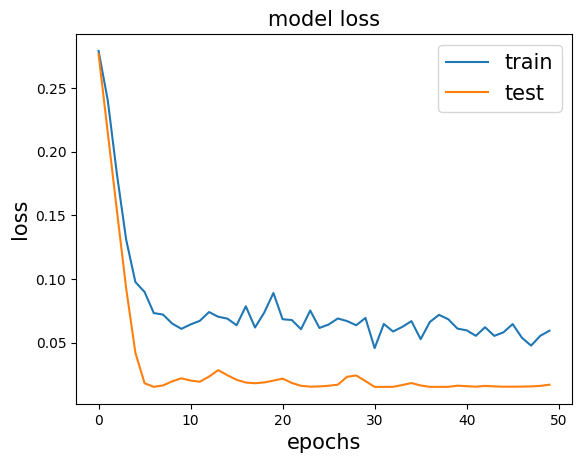

In [ ]:
plot_history(d_history)

In [ ]:
def lstm_forecast(x_test_data, y_test_data, model=None, window_size=4):
    forecast_results = []
    for i in range(15):
        if i==0:
            atf = np.array([list(x_test_data[-1][1:]) + list([y_test_data[-1]])], dtype='float64')
            value = model.predict(atf[...,np.newaxis])
            forecast_results.extend(list(value[0]))
        else:
            atf = np.array([list(atf[0][1:]) + list(value[0])], dtype='float64')
            value = model.predict(atf[...,np.newaxis])
            forecast_results.extend(list(value[0]))
    return forecast_results

def lstm_pred(test_data, model):
    return model.predict(test_data)

def plot_lstm_forecast(name, df_func, preds, forecasts):
    total_val = list(df_func[name]) + list(forecasts)
    curr_ind = list(df_func.index)
    for t in range(73,88):
        curr_ind.append(f'Month {t}')
    sns.lineplot(x=curr_ind, y=total_val, label = 'Forecast');
    plot_preds = list(df_func[name].iloc[:60])+list(preds)
    plt.plot(plot_preds, label='Predictions');
    plt.plot(df_func[name], label='Actual');
    plt.legend(loc='best');
    xt = plt.xticks()
    new_t = []
    for t in xt[1]:
        new_t.append('M_'+t.get_text().split(' ')[-1])
    plt.xticks(xt[0], new_t);
    plt.title(name, y=0)
    plt.xticks(rotation=90);
    plt.show();

1/1 [==============================] - 0s 25ms/step


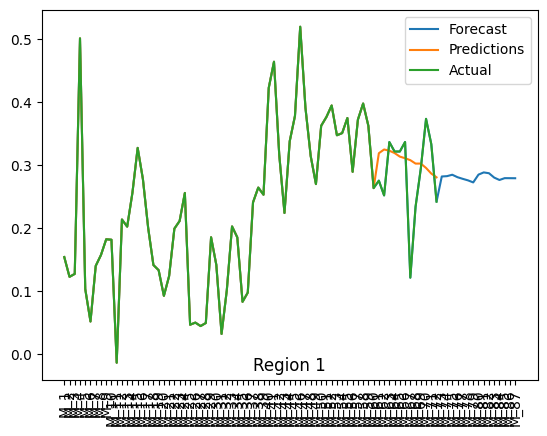

array([[0.2822447 , 0.28277359, 0.28501709, 0.28110175, 0.27848696,
        0.27607481, 0.27283283, 0.28519531, 0.28870041, 0.2874281 ,
        0.28048321, 0.27669122, 0.27960618, 0.27955066, 0.27945592]])

In [ ]:
fr = scaler.inverse_transform([lstm_forecast(X_test[:,:,0], Y_test[:,0], model, 12)])
preds = scaler.inverse_transform(lstm_pred(X_test, model))
plot_lstm_forecast('Region 1', df_eda, preds[:,0], fr[0])
fr

In [ ]:
# cnn
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Flatten, LeakyReLU
from tensorflow.keras.layers import Input, Reshape, Dense, Lambda
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import Conv1D, UpSampling1D
from tensorflow.keras.layers import AveragePooling1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras import regularizers, activations, initializers, constraints
from tensorflow.keras.constraints import Constraint
from tensorflow.keras.callbacks import History, EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.python.keras.utils.generic_utils import get_custom_objects
import string

In [ ]:
def train_cnn(lu, optimizer_type, lr, p=0.3, alp=0.3, ne=50, bs=4):
    if optimizer_type=='adam':
        optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr, decay=1e-3 / 200)
    else:
        optimizer = SGD(learning_rate=lr)

    input_data = Input(shape=(X_train.shape[1], X_train.shape[2]))

    i=0
    while i<len(lu):
        if i==0:
            _ = Conv1D(lu[i], 3, padding='same', data_format='channels_last')(input_data)
            _ = LeakyReLU(alpha=alp)(_)
            _ = MaxPooling1D(2, padding="same")(_)
        else:
            _ = Conv1D(lu[i], 6, padding='same', data_format='channels_last')(_)
            _ = LeakyReLU(alpha=alp)(_)
            _ = MaxPooling1D(2, padding="same")(_)

        i+=1

    _ = Flatten()(_)
    _ = Dropout(p)(_)

    output_data = Dense(Y_train.shape[1])(_)

    model = Model(input_data, output_data)
    model.compile(loss='mse', optimizer=optimizer)
    plot_model(model, to_file='/content/1dcnn.png')

    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = ne, batch_size = bs)
    d_history = history.history
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    print('\n')
    return rmse, model, d_history

In [ ]:
score, model, d_history = train_cnn([8,16,32,64], 'adam', 0.001, p=0.3, alp=0.3, ne=50, bs=8)
score

Epoch 1/50
6/6 [==============================] - 1s 54ms/step - loss: 0.0738 - val_loss: 0.0434
Epoch 2/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0508 - val_loss: 0.0323
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0389 - val_loss: 0.0278
Epoch 4/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0390 - val_loss: 0.0186
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0396 - val_loss: 0.0301
Epoch 6/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0325 - val_loss: 0.0180
Epoch 7/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0306 - val_loss: 0.0188
Epoch 8/50
6/6 [==============================] - 0s 18ms/step - loss: 0.0345 - val_loss: 0.0212
Epoch 9/50
6/6 [==============================] - 0s 17ms/step - loss: 0.0329 - val_loss: 0.0179
Epoch 10/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0292 - val_loss: 0.0186
Epoch 11/50
6/6 [============

0.12801656301613393

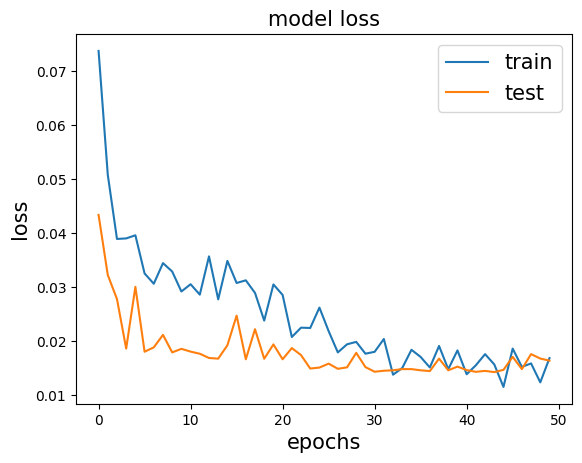

In [ ]:
plot_history(d_history)

In [ ]:
score, model, d_history = train_cnn([64,16,8], 'adam', 0.001, p=0.2, alp=0.3, ne=50, bs=8)
score

Epoch 1/50
6/6 [==============================] - 2s 83ms/step - loss: 0.2001 - val_loss: 0.0861
Epoch 2/50
6/6 [==============================] - 0s 17ms/step - loss: 0.0692 - val_loss: 0.0190
Epoch 3/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0447 - val_loss: 0.0443
Epoch 4/50
6/6 [==============================] - 0s 35ms/step - loss: 0.0431 - val_loss: 0.0167
Epoch 5/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0351 - val_loss: 0.0167
Epoch 6/50
6/6 [==============================] - 0s 20ms/step - loss: 0.0331 - val_loss: 0.0147
Epoch 7/50
6/6 [==============================] - 0s 30ms/step - loss: 0.0285 - val_loss: 0.0175
Epoch 8/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0394 - val_loss: 0.0151
Epoch 9/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0348 - val_loss: 0.0143
Epoch 10/50
6/6 [==============================] - 0s 23ms/step - loss: 0.0336 - val_loss: 0.0143
Epoch 11/50
6/6 [============

0.12220603099095342

In [ ]:
score, model, d_history = train_cnn([16,128,512], 'adam', 0.001, p=0.2, alp=0.3, ne=50, bs=8)
score

Epoch 1/50
6/6 [==============================] - 2s 125ms/step - loss: 0.0936 - val_loss: 0.0278
Epoch 2/50
6/6 [==============================] - 0s 35ms/step - loss: 0.0449 - val_loss: 0.0280
Epoch 3/50
6/6 [==============================] - 0s 59ms/step - loss: 0.0359 - val_loss: 0.0164
Epoch 4/50
6/6 [==============================] - 0s 63ms/step - loss: 0.0343 - val_loss: 0.0187
Epoch 5/50
6/6 [==============================] - 0s 39ms/step - loss: 0.0229 - val_loss: 0.0290
Epoch 6/50
6/6 [==============================] - 0s 66ms/step - loss: 0.0274 - val_loss: 0.0205
Epoch 7/50
6/6 [==============================] - 0s 44ms/step - loss: 0.0290 - val_loss: 0.0139
Epoch 8/50
6/6 [==============================] - 0s 55ms/step - loss: 0.0193 - val_loss: 0.0135
Epoch 9/50
6/6 [==============================] - 0s 32ms/step - loss: 0.0185 - val_loss: 0.0143
Epoch 10/50
6/6 [==============================] - 0s 32ms/step - loss: 0.0178 - val_loss: 0.0132
Epoch 11/50
6/6 [===========

0.11879217761993908

In [ ]:
score, model, d_history = train_cnn([16,64,128], 'adam', 0.001, p=0.2, alp=0.3, ne=50, bs=8)
score

Epoch 1/50
6/6 [==============================] - 1s 62ms/step - loss: 0.1304 - val_loss: 0.0358
Epoch 2/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0427 - val_loss: 0.0279
Epoch 3/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0324 - val_loss: 0.0173
Epoch 4/50
6/6 [==============================] - 0s 38ms/step - loss: 0.0279 - val_loss: 0.0177
Epoch 5/50
6/6 [==============================] - 0s 38ms/step - loss: 0.0299 - val_loss: 0.0221
Epoch 6/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0275 - val_loss: 0.0157
Epoch 7/50
6/6 [==============================] - 0s 38ms/step - loss: 0.0283 - val_loss: 0.0167
Epoch 8/50
6/6 [==============================] - 0s 35ms/step - loss: 0.0235 - val_loss: 0.0167
Epoch 9/50
6/6 [==============================] - 0s 45ms/step - loss: 0.0232 - val_loss: 0.0149
Epoch 10/50
6/6 [==============================] - 0s 41ms/step - loss: 0.0192 - val_loss: 0.0148
Epoch 11/50
6/6 [============

0.1177735344380112

In [ ]:
score, model, d_history = train_cnn([8,16,64], 'adam', 0.001, p=0.2, alp=0.3, ne=50, bs=8)
score

Epoch 1/50
6/6 [==============================] - 1s 71ms/step - loss: 0.2267 - val_loss: 0.1127
Epoch 2/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0729 - val_loss: 0.0144
Epoch 3/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0454 - val_loss: 0.0603
Epoch 4/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0472 - val_loss: 0.0265
Epoch 5/50
6/6 [==============================] - 0s 18ms/step - loss: 0.0348 - val_loss: 0.0159
Epoch 6/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0377 - val_loss: 0.0170
Epoch 7/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0322 - val_loss: 0.0141
Epoch 8/50
6/6 [==============================] - 0s 17ms/step - loss: 0.0278 - val_loss: 0.0164
Epoch 9/50
6/6 [==============================] - 0s 17ms/step - loss: 0.0293 - val_loss: 0.0180
Epoch 10/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0262 - val_loss: 0.0164
Epoch 11/50
6/6 [============

0.12084150411670454

In [ ]:
score, model, d_history = train_cnn([4,8,16], 'adam', 0.001, p=0.2, alp=0.3, ne=50, bs=8)
score

Epoch 1/50
6/6 [==============================] - 1s 60ms/step - loss: 0.2543 - val_loss: 0.2187
Epoch 2/50
6/6 [==============================] - 0s 14ms/step - loss: 0.1645 - val_loss: 0.1196
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1045 - val_loss: 0.0477
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0572 - val_loss: 0.0164
Epoch 5/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0427 - val_loss: 0.0245
Epoch 6/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0423 - val_loss: 0.0246
Epoch 7/50
6/6 [==============================] - 0s 17ms/step - loss: 0.0410 - val_loss: 0.0203
Epoch 8/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0382 - val_loss: 0.0166
Epoch 9/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0307 - val_loss: 0.0157
Epoch 10/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0409 - val_loss: 0.0156
Epoch 11/50
6/6 [============

0.11733715888045133

In [ ]:
score, model, d_history = train_cnn([8,16], 'adam', 0.001, p=0.2, alp=0.3, ne=50, bs=8)
score

Epoch 1/50
6/6 [==============================] - 2s 103ms/step - loss: 0.3859 - val_loss: 0.3656
Epoch 2/50
6/6 [==============================] - 0s 25ms/step - loss: 0.3042 - val_loss: 0.2824
Epoch 3/50
6/6 [==============================] - 0s 16ms/step - loss: 0.2376 - val_loss: 0.2148
Epoch 4/50
6/6 [==============================] - 0s 21ms/step - loss: 0.1870 - val_loss: 0.1526
Epoch 5/50
6/6 [==============================] - 0s 20ms/step - loss: 0.1305 - val_loss: 0.0981
Epoch 6/50
6/6 [==============================] - 0s 20ms/step - loss: 0.1118 - val_loss: 0.0543
Epoch 7/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0627 - val_loss: 0.0264
Epoch 8/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0439 - val_loss: 0.0152
Epoch 9/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0336 - val_loss: 0.0176
Epoch 10/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0471 - val_loss: 0.0212
Epoch 11/50
6/6 [===========

0.11912895843692638

In [ ]:
score, model, d_history = train_cnn([16,8], 'adam', 0.001, p=0.2, alp=0.3, ne=50, bs=8)
score

Epoch 1/50
6/6 [==============================] - 2s 191ms/step - loss: 0.0682 - val_loss: 0.0181
Epoch 2/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0416 - val_loss: 0.0232
Epoch 3/50
6/6 [==============================] - 0s 29ms/step - loss: 0.0382 - val_loss: 0.0261
Epoch 4/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0410 - val_loss: 0.0189
Epoch 5/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0319 - val_loss: 0.0175
Epoch 6/50
6/6 [==============================] - 0s 33ms/step - loss: 0.0334 - val_loss: 0.0172
Epoch 7/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0317 - val_loss: 0.0177
Epoch 8/50
6/6 [==============================] - 0s 32ms/step - loss: 0.0404 - val_loss: 0.0172
Epoch 9/50
6/6 [==============================] - 0s 33ms/step - loss: 0.0350 - val_loss: 0.0176
Epoch 10/50
6/6 [==============================] - 0s 29ms/step - loss: 0.0294 - val_loss: 0.0170
Epoch 11/50
6/6 [===========

0.11614274221211765

In [ ]:
score, model, d_history = train_cnn([8,16,64], 'adam', 0.001, p=0.2, alp=0.3, ne=50, bs=8)
score

Epoch 1/50
6/6 [==============================] - 1s 62ms/step - loss: 0.1808 - val_loss: 0.0680
Epoch 2/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0549 - val_loss: 0.0251
Epoch 3/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0409 - val_loss: 0.0594
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0425 - val_loss: 0.0209
Epoch 5/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0324 - val_loss: 0.0159
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0291 - val_loss: 0.0155
Epoch 7/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0304 - val_loss: 0.0190
Epoch 8/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0287 - val_loss: 0.0194
Epoch 9/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0300 - val_loss: 0.0163
Epoch 10/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0285 - val_loss: 0.0152
Epoch 11/50
6/6 [============

0.13471544612969943

1/1 [==============================] - 0s 29ms/step


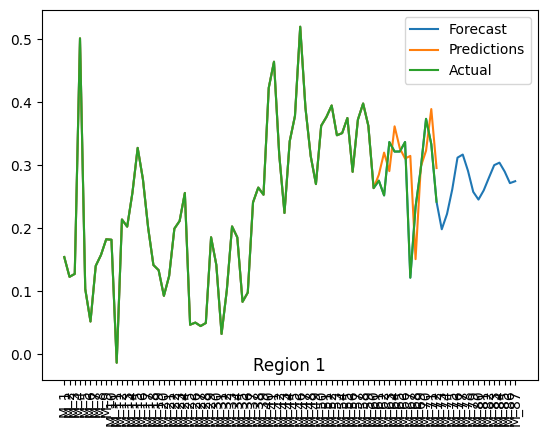

array([[0.19843462, 0.22276896, 0.26178357, 0.31213839, 0.31707304,
        0.29121217, 0.2578437 , 0.2456004 , 0.26021289, 0.2804689 ,
        0.30025583, 0.30419102, 0.29002015, 0.27169952, 0.27474344]])

In [ ]:
fr = scaler.inverse_transform([lstm_forecast(X_test[:,:,0], Y_test[:,0], model, 12)])
preds = scaler.inverse_transform(lstm_pred(X_test, model))
plot_lstm_forecast('Region 1', df_eda, preds[:,0], fr[0])
fr

In [ ]:
# transformer/ attention
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Flatten, LeakyReLU
from tensorflow.keras.layers import Input, Reshape, Dense, Lambda
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import Conv1D, UpSampling1D
from tensorflow.keras.layers import AveragePooling1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras import regularizers, activations, initializers, constraints
from tensorflow.keras.constraints import Constraint
from tensorflow.keras.callbacks import History, EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.python.keras.utils.generic_utils import get_custom_objects
import string

In [ ]:
def get_tf_encoder(input, head_size, num_heads, ff_dim, dropout=0.4):

    _ = LayerNormalization(epsilon=1e-6)(input)
    _ = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(_, _)
    _ = Dropout(dropout)(_)
    res = _ + input

    _ = LayerNormalization(epsilon=1e-6)(res)
    _ = Conv1D(filters=ff_dim, kernel_size=3, activation="relu", padding="same")(_)
    _ = Dropout(dropout)(_)
    _ = Conv1D(filters=input.shape[-1], kernel_size=1)(_)
    return _ + res

def train_tf_model(input, output, lu, optimizer_type, lr, p=0.4, p_mlp=0.25, ne=50, bs=4,
                 num_transformer_blocks=3, head_size=3, num_heads=8, ff_dim=8):
    if optimizer_type=='adam':
        optimizer = Adam(learning_rate=lr)
    else:
        optimizer = SGD(learning_rate=lr)

    input_data = Input(batch_shape=(bs, input.shape[1], input.shape[2]))
    _ = input_data
    for n in range(num_transformer_blocks):
        _ = get_tf_encoder(_, head_size, num_heads, ff_dim, p)
    _ = GlobalAveragePooling1D(data_format="channels_first")(_)
    for d in lu:
        _ = Dense(d, activation="relu")(_)
        _ = Dropout(p_mlp)(_)
    output_data = Dense(output.shape[1])(_)
    model = Model(input_data, output_data)
    model.compile(loss='mse', optimizer=optimizer)
    plot_model(model, to_file='/content/attention.png')

    history = model.fit(input, output, validation_data=(X_test, Y_test), epochs = ne, batch_size = bs)
    d_history = history.history
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    print('\n')
    return rmse, model, d_history

In [ ]:
score, model, d_history = train_tf_model(X_train, Y_train, [16], 'adam', 0.001, p=0.4,
                                         p_mlp=0.25, bs=8)
score

Epoch 1/50
6/6 [==============================] - 11s 187ms/step - loss: 0.1348 - val_loss: 0.0194
Epoch 2/50
6/6 [==============================] - 0s 40ms/step - loss: 0.1607 - val_loss: 0.0188
Epoch 3/50
6/6 [==============================] - 0s 42ms/step - loss: 0.1079 - val_loss: 0.0188
Epoch 4/50
6/6 [==============================] - 0s 35ms/step - loss: 0.0859 - val_loss: 0.0201
Epoch 5/50
6/6 [==============================] - 0s 39ms/step - loss: 0.0980 - val_loss: 0.0192
Epoch 6/50
6/6 [==============================] - 0s 37ms/step - loss: 0.0974 - val_loss: 0.0211
Epoch 7/50
6/6 [==============================] - 0s 48ms/step - loss: 0.1226 - val_loss: 0.0206
Epoch 8/50
6/6 [==============================] - 0s 44ms/step - loss: 0.0585 - val_loss: 0.0194
Epoch 9/50
6/6 [==============================] - 0s 35ms/step - loss: 0.0700 - val_loss: 0.0209
Epoch 10/50
6/6 [==============================] - 0s 31ms/step - loss: 0.1077 - val_loss: 0.0213
Epoch 11/50
6/6 [==========

0.1434098714613741

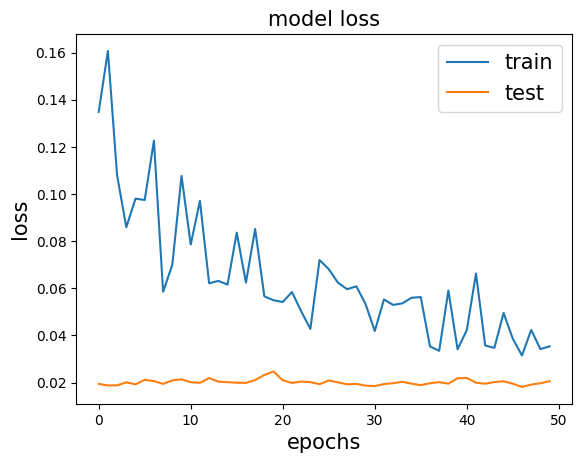

In [ ]:
plot_history(d_history)

In [ ]:
score, model, d_history = train_tf_model(X_train, Y_train, [8,16], 'adam', 0.001, p=0.4,
                                         p_mlp=0.25, bs=8)
score

Epoch 1/50
6/6 [==============================] - 14s 164ms/step - loss: 0.1045 - val_loss: 0.0475
Epoch 2/50
6/6 [==============================] - 0s 30ms/step - loss: 0.1440 - val_loss: 0.0383
Epoch 3/50
6/6 [==============================] - 0s 29ms/step - loss: 0.0893 - val_loss: 0.0299
Epoch 4/50
6/6 [==============================] - 0s 30ms/step - loss: 0.0696 - val_loss: 0.0378
Epoch 5/50
6/6 [==============================] - 0s 28ms/step - loss: 0.0970 - val_loss: 0.0525
Epoch 6/50
6/6 [==============================] - 0s 31ms/step - loss: 0.1103 - val_loss: 0.0531
Epoch 7/50
6/6 [==============================] - 0s 28ms/step - loss: 0.0785 - val_loss: 0.0375
Epoch 8/50
6/6 [==============================] - 0s 30ms/step - loss: 0.1046 - val_loss: 0.0304
Epoch 9/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0872 - val_loss: 0.0303
Epoch 10/50
6/6 [==============================] - 0s 32ms/step - loss: 0.0865 - val_loss: 0.0354
Epoch 11/50
6/6 [==========

0.16651251533077369

In [ ]:
score, model, d_history = train_tf_model(X_train, Y_train, [8,16,64], 'adam', 0.001, p=0.4,
                                         p_mlp=0.25, bs=8)
score

Epoch 1/50
6/6 [==============================] - 7s 98ms/step - loss: 0.1990 - val_loss: 0.1317
Epoch 2/50
6/6 [==============================] - 0s 18ms/step - loss: 0.1074 - val_loss: 0.0410
Epoch 3/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0726 - val_loss: 0.0168
Epoch 4/50
6/6 [==============================] - 0s 18ms/step - loss: 0.1037 - val_loss: 0.0162
Epoch 5/50
6/6 [==============================] - 0s 18ms/step - loss: 0.0858 - val_loss: 0.0257
Epoch 6/50
6/6 [==============================] - 0s 18ms/step - loss: 0.0833 - val_loss: 0.0338
Epoch 7/50
6/6 [==============================] - 0s 20ms/step - loss: 0.0757 - val_loss: 0.0359
Epoch 8/50
6/6 [==============================] - 0s 22ms/step - loss: 0.0788 - val_loss: 0.0353
Epoch 9/50
6/6 [==============================] - 0s 20ms/step - loss: 0.0845 - val_loss: 0.0319
Epoch 10/50
6/6 [==============================] - 0s 20ms/step - loss: 0.0729 - val_loss: 0.0276
Epoch 11/50
6/6 [============

0.15816736727411929

In [ ]:
score, model, d_history = train_tf_model(X_train, Y_train, [8,16,64], 'adam', 0.0001, p=0.4,
                                         p_mlp=0.25, bs=8)
score

Epoch 1/50
6/6 [==============================] - 7s 108ms/step - loss: 0.3159 - val_loss: 0.4153
Epoch 2/50
6/6 [==============================] - 0s 19ms/step - loss: 0.2941 - val_loss: 0.3963
Epoch 3/50
6/6 [==============================] - 0s 20ms/step - loss: 0.2768 - val_loss: 0.3788
Epoch 4/50
6/6 [==============================] - 0s 18ms/step - loss: 0.2868 - val_loss: 0.3620
Epoch 5/50
6/6 [==============================] - 0s 16ms/step - loss: 0.2830 - val_loss: 0.3460
Epoch 6/50
6/6 [==============================] - 0s 18ms/step - loss: 0.2491 - val_loss: 0.3314
Epoch 7/50
6/6 [==============================] - 0s 19ms/step - loss: 0.2237 - val_loss: 0.3183
Epoch 8/50
6/6 [==============================] - 0s 21ms/step - loss: 0.2693 - val_loss: 0.3049
Epoch 9/50
6/6 [==============================] - 0s 17ms/step - loss: 0.2130 - val_loss: 0.2912
Epoch 10/50
6/6 [==============================] - 0s 21ms/step - loss: 0.1869 - val_loss: 0.2773
Epoch 11/50
6/6 [===========

0.19636262512454536

In [ ]:
score, model, d_history = train_tf_model(X_train, Y_train, [8,16], 'adam', 0.0001, p=0.4,
                                         p_mlp=0.25, bs=8)
score

Epoch 1/50
6/6 [==============================] - 7s 108ms/step - loss: 0.2885 - val_loss: 0.3599
Epoch 2/50
6/6 [==============================] - 0s 19ms/step - loss: 0.2178 - val_loss: 0.3526
Epoch 3/50
6/6 [==============================] - 0s 15ms/step - loss: 0.2909 - val_loss: 0.3453
Epoch 4/50
6/6 [==============================] - 0s 18ms/step - loss: 0.2933 - val_loss: 0.3378
Epoch 5/50
6/6 [==============================] - 0s 20ms/step - loss: 0.2506 - val_loss: 0.3304
Epoch 6/50
6/6 [==============================] - 0s 20ms/step - loss: 0.2232 - val_loss: 0.3231
Epoch 7/50
6/6 [==============================] - 0s 22ms/step - loss: 0.2697 - val_loss: 0.3159
Epoch 8/50
6/6 [==============================] - 0s 18ms/step - loss: 0.2772 - val_loss: 0.3087
Epoch 9/50
6/6 [==============================] - 0s 17ms/step - loss: 0.2465 - val_loss: 0.3021
Epoch 10/50
6/6 [==============================] - 0s 19ms/step - loss: 0.2709 - val_loss: 0.2953
Epoch 11/50
6/6 [===========

0.29152816843051077

In [ ]:
score, model, d_history = train_tf_model(X_train, Y_train, [16], 'adam', 0.0001, p=0.4,
                                         p_mlp=0.25, bs=8)
score

Epoch 1/50
6/6 [==============================] - 6s 102ms/step - loss: 0.8483 - val_loss: 1.1815
Epoch 2/50
6/6 [==============================] - 0s 17ms/step - loss: 0.7615 - val_loss: 1.1333
Epoch 3/50
6/6 [==============================] - 0s 15ms/step - loss: 0.8793 - val_loss: 1.0852
Epoch 4/50
6/6 [==============================] - 0s 16ms/step - loss: 0.9132 - val_loss: 1.0386
Epoch 5/50
6/6 [==============================] - 0s 18ms/step - loss: 0.8372 - val_loss: 0.9939
Epoch 6/50
6/6 [==============================] - 0s 16ms/step - loss: 0.8000 - val_loss: 0.9511
Epoch 7/50
6/6 [==============================] - 0s 20ms/step - loss: 0.7027 - val_loss: 0.9134
Epoch 8/50
6/6 [==============================] - 0s 18ms/step - loss: 0.6447 - val_loss: 0.8794
Epoch 9/50
6/6 [==============================] - 0s 15ms/step - loss: 0.5937 - val_loss: 0.8500
Epoch 10/50
6/6 [==============================] - 0s 18ms/step - loss: 0.6117 - val_loss: 0.8239
Epoch 11/50
6/6 [===========

0.6236116639836218

In [ ]:
score, model, d_history = train_tf_model(X_train, Y_train, [8,16,64], 'adam', 0.001, p=0.3,
                                         p_mlp=0.3, bs=8)
score

Epoch 1/50
6/6 [==============================] - 16s 415ms/step - loss: 0.2073 - val_loss: 0.2702
Epoch 2/50
6/6 [==============================] - 1s 149ms/step - loss: 0.2046 - val_loss: 0.1850
Epoch 3/50
6/6 [==============================] - 1s 131ms/step - loss: 0.0959 - val_loss: 0.1110
Epoch 4/50
6/6 [==============================] - 1s 99ms/step - loss: 0.1155 - val_loss: 0.0788
Epoch 5/50
6/6 [==============================] - 1s 97ms/step - loss: 0.0980 - val_loss: 0.0563
Epoch 6/50
6/6 [==============================] - 0s 37ms/step - loss: 0.0918 - val_loss: 0.0439
Epoch 7/50
6/6 [==============================] - 0s 28ms/step - loss: 0.0861 - val_loss: 0.0432
Epoch 8/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0825 - val_loss: 0.0478
Epoch 9/50
6/6 [==============================] - 0s 28ms/step - loss: 0.0916 - val_loss: 0.0680
Epoch 10/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0888 - val_loss: 0.0767
Epoch 11/50
6/6 [========

1/1 [==============================] - 1s 1s/step




0.1320189955060246

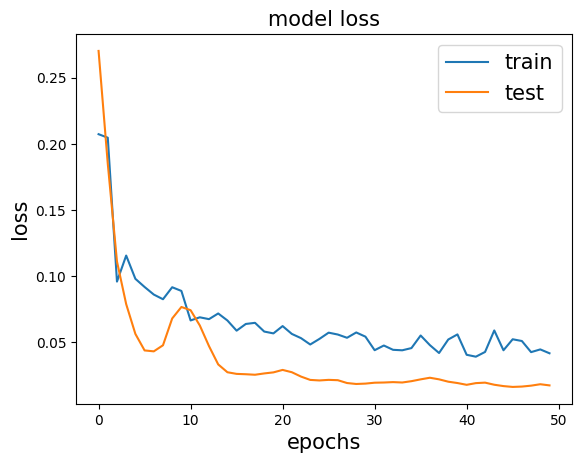

In [ ]:
plot_history(d_history)

In [ ]:
score, model, d_history = train_tf_model(X_train, Y_train, [16], 'adam', 0.001, p=0.3,
                                         p_mlp=0.3, bs=8)
score

Epoch 1/50
6/6 [==============================] - 12s 477ms/step - loss: 0.6342 - val_loss: 0.5934
Epoch 2/50
6/6 [==============================] - 0s 66ms/step - loss: 0.5346 - val_loss: 0.4770
Epoch 3/50
6/6 [==============================] - 0s 67ms/step - loss: 0.4164 - val_loss: 0.3984
Epoch 4/50
6/6 [==============================] - 0s 48ms/step - loss: 0.3873 - val_loss: 0.3464
Epoch 5/50
6/6 [==============================] - 0s 45ms/step - loss: 0.2996 - val_loss: 0.3145
Epoch 6/50
6/6 [==============================] - 0s 48ms/step - loss: 0.3278 - val_loss: 0.2979
Epoch 7/50
6/6 [==============================] - 0s 60ms/step - loss: 0.2438 - val_loss: 0.2839
Epoch 8/50
6/6 [==============================] - 0s 70ms/step - loss: 0.2851 - val_loss: 0.2692
Epoch 9/50
6/6 [==============================] - 0s 41ms/step - loss: 0.2050 - val_loss: 0.2561
Epoch 10/50
6/6 [==============================] - 0s 53ms/step - loss: 0.2683 - val_loss: 0.2451
Epoch 11/50
6/6 [==========

0.12626256697779017

1/1 [==============================] - 0s 24ms/step


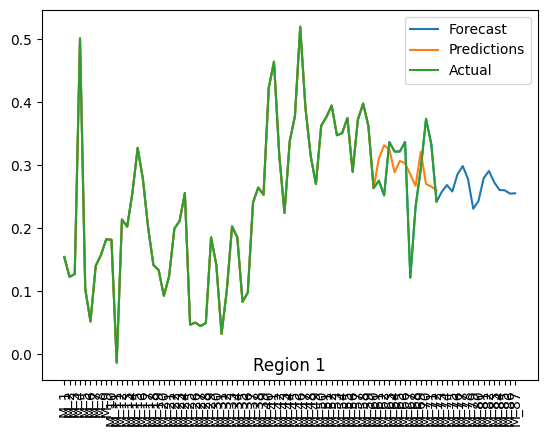

array([[0.25794312, 0.26863064, 0.25839339, 0.2857304 , 0.29883879,
        0.278356  , 0.23097372, 0.24343499, 0.27979232, 0.29094506,
        0.27308069, 0.26079336, 0.26029554, 0.25508546, 0.25555037]])

In [ ]:
fr = scaler.inverse_transform([lstm_forecast(X_test[:,:,0], Y_test[:,0], model, 12)])
preds = scaler.inverse_transform(lstm_pred(X_test, model))
plot_lstm_forecast('Region 1', df_eda, preds[:,0], fr[0])
fr

In [ ]:
# bidirectional lstm

In [ ]:
from tensorflow.keras.layers import Input, Dense, LSTM, Conv1D,Dropout,Bidirectional,Multiply,Permute,RepeatVector
from tensorflow.keras.models import Model

#from attention_utils import get_activations
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Multiply
# from keras.layers.core import *
# from tensorflow.keras.layers.recurrent import LSTM
from tensorflow.keras.models import *

import  pandas as pd
import  numpy as np

SINGLE_ATTENTION_VECTOR = False
def attention_3d_block(inputs_):
    # inputs.shape = (batch_size, time_steps, input_dim)
    input_dim = int(inputs_.shape[2])
    a = inputs_
    a = Dense(input_dim, activation='softmax')(a)
    if SINGLE_ATTENTION_VECTOR:
        a = Lambda(lambda x: K.mean(x, axis=1), name='dim_reduction')(a)
        a = RepeatVector(input_dim)(a)
    a_probs = Permute((1, 2), name='attention_vec')(a)

    #output_attention_mul = merge([inputs, a_probs], name='attention_mul', mode='mul')
    output_attention_mul = Multiply()([inputs_, a_probs])
    return output_attention_mul

# Another way of writing the attention mechanism is suitable for the use of the above error source:https://blog.csdn.net/uhauha2929/article/details/80733255
def attention_3d_block2(inputs, single_attention_vector=False):
    # If the upper layer is LSTM, you need return_sequences=True
    # inputs.shape = (batch_size, time_steps, input_dim)
    time_steps = K.int_shape(inputs)[1]
    input_dim = K.int_shape(inputs)[2]
    a = Permute((2, 1))(inputs)
    a = Dense(time_steps, activation='softmax')(a)
    if single_attention_vector:
        a = Lambda(lambda x: K.mean(x, axis=1))(a)
        a = RepeatVector(input_dim)(a)

    a_probs = Permute((2, 1))(a)
    # Multiplied by the attention weight, but there is no summation, it seems to have little effect
    # If you classify tasks, you can do Flatten expansion
    # element-wise
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul

def attention_model(input, output, luc, lub, optimizer_type, lr, p=0.3, ne=50, bs=4):
    if optimizer_type=='adam':
        optimizer = Adam(learning_rate=lr)
    else:
        optimizer = SGD(learning_rate=lr)

    inputs = Input(batch_shape=(bs, input.shape[1], input.shape[2]))

    i=0
    while i<len(luc):
        if i==0:
            x = Conv1D(filters = luc[i], kernel_size = 1, activation = 'relu')(inputs)  #, padding = 'same'
        else:
            x = Conv1D(filters = luc[i], kernel_size = 1, activation = 'relu')(x)  #, padding = 'same'
        x = Dropout(p)(x)
        i+=1

    i=0
    while i<len(lub):
        #lstm_out = Bidirectional(LSTM(lstm_units, activation='relu'), name='bilstm')(x)
        #For GPU you can use CuDNNLSTM
        lstm_out = Bidirectional(LSTM(lub[i], return_sequences=True))(x)
        lstm_out = Dropout(p)(lstm_out)
        i+=1

    attention_mul = attention_3d_block(lstm_out)
    attention_mul = Flatten()(attention_mul)
    output_data = Dense(1, activation='linear')(attention_mul)
    model = Model(inputs, output_data)
    model.compile(loss='mse', optimizer=optimizer)
    plot_model(model, to_file='/content/1dbidir.png')

    history = model.fit(input, output, validation_data=(X_test, Y_test), epochs = ne, batch_size = bs)
    d_history = history.history
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    print('\n')
    return rmse, model, d_history

In [ ]:
score, model, d_history = attention_model(X_train, Y_train, [64], [64], 'adam', 0.001, p=0.3, ne=50, bs=8)
score

Epoch 1/50
6/6 [==============================] - 8s 421ms/step - loss: 0.2907 - val_loss: 0.3192
Epoch 2/50
6/6 [==============================] - 0s 40ms/step - loss: 0.2789 - val_loss: 0.3003
Epoch 3/50
6/6 [==============================] - 0s 57ms/step - loss: 0.2591 - val_loss: 0.2600
Epoch 4/50
6/6 [==============================] - 0s 63ms/step - loss: 0.2131 - val_loss: 0.1761
Epoch 5/50
6/6 [==============================] - 0s 65ms/step - loss: 0.1336 - val_loss: 0.0742
Epoch 6/50
6/6 [==============================] - 0s 64ms/step - loss: 0.0646 - val_loss: 0.0197
Epoch 7/50
6/6 [==============================] - 0s 45ms/step - loss: 0.0534 - val_loss: 0.0160
Epoch 8/50
6/6 [==============================] - 0s 57ms/step - loss: 0.0535 - val_loss: 0.0153
Epoch 9/50
6/6 [==============================] - 0s 65ms/step - loss: 0.0537 - val_loss: 0.0157
Epoch 10/50
6/6 [==============================] - 0s 70ms/step - loss: 0.0470 - val_loss: 0.0191
Epoch 11/50
6/6 [===========

0.14107637586948543

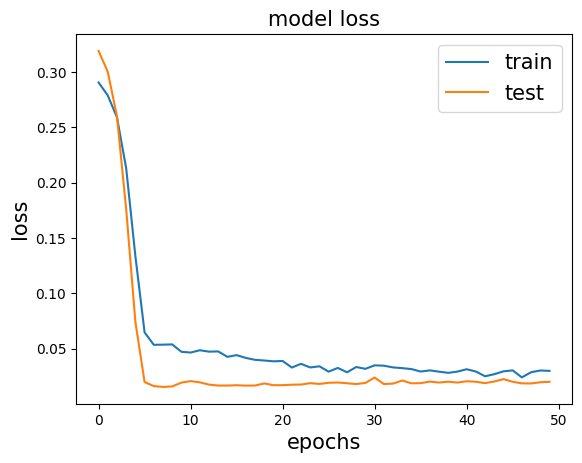

In [ ]:
plot_history(d_history)

In [ ]:
score, model, d_history = attention_model(X_train, Y_train, [8,16,64], [8,16,64],
                                          'adam', 0.001, 0.3, 50, 8)
score

Epoch 1/50
6/6 [==============================] - 7s 237ms/step - loss: 0.2911 - val_loss: 0.3212
Epoch 2/50
6/6 [==============================] - 0s 24ms/step - loss: 0.2798 - val_loss: 0.3051
Epoch 3/50
6/6 [==============================] - 0s 29ms/step - loss: 0.2611 - val_loss: 0.2703
Epoch 4/50
6/6 [==============================] - 0s 25ms/step - loss: 0.2182 - val_loss: 0.1867
Epoch 5/50
6/6 [==============================] - 0s 27ms/step - loss: 0.1403 - val_loss: 0.0817
Epoch 6/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0665 - val_loss: 0.0229
Epoch 7/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0483 - val_loss: 0.0150
Epoch 8/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0558 - val_loss: 0.0151
Epoch 9/50
6/6 [==============================] - 0s 23ms/step - loss: 0.0555 - val_loss: 0.0161
Epoch 10/50
6/6 [==============================] - 0s 28ms/step - loss: 0.0502 - val_loss: 0.0205
Epoch 11/50
6/6 [===========

0.13540028240540544

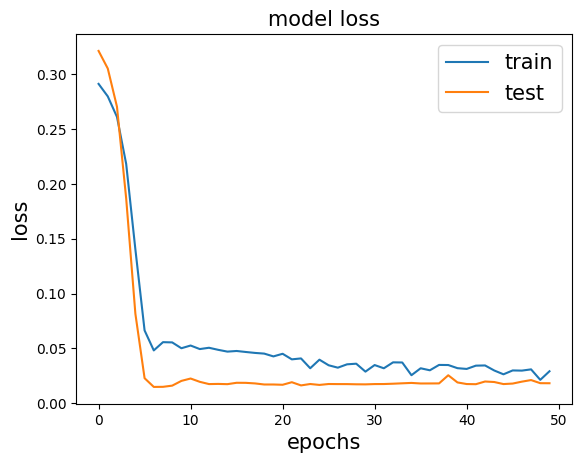

In [ ]:
plot_history(d_history)

In [ ]:
score, model, d_history = attention_model(X_train, Y_train, [16,16], [64,64],
                                          'adam', 0.001, 0.5, 50, 8)
score

Epoch 1/50
6/6 [==============================] - 12s 224ms/step - loss: 0.2917 - val_loss: 0.3234
Epoch 2/50
6/6 [==============================] - 0s 23ms/step - loss: 0.2832 - val_loss: 0.3127
Epoch 3/50
6/6 [==============================] - 0s 21ms/step - loss: 0.2723 - val_loss: 0.2964
Epoch 4/50
6/6 [==============================] - 0s 23ms/step - loss: 0.2523 - val_loss: 0.2630
Epoch 5/50
6/6 [==============================] - 0s 23ms/step - loss: 0.2101 - val_loss: 0.1832
Epoch 6/50
6/6 [==============================] - 0s 26ms/step - loss: 0.1294 - val_loss: 0.0713
Epoch 7/50
6/6 [==============================] - 0s 22ms/step - loss: 0.0633 - val_loss: 0.0182
Epoch 8/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0532 - val_loss: 0.0151
Epoch 9/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0553 - val_loss: 0.0149
Epoch 10/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0597 - val_loss: 0.0169
Epoch 11/50
6/6 [==========

0.1408762503624004

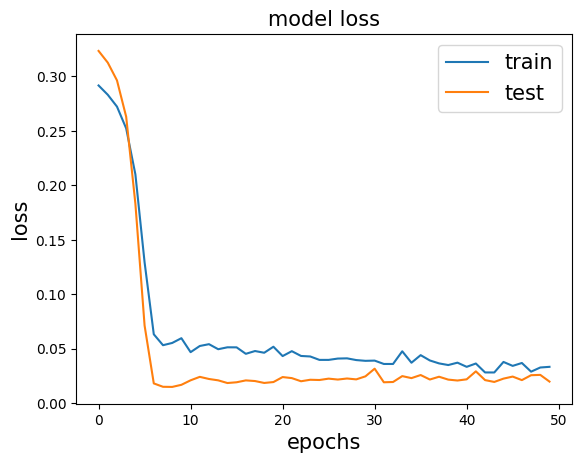

In [ ]:
plot_history(d_history)

1/1 [==============================] - 0s 42ms/step


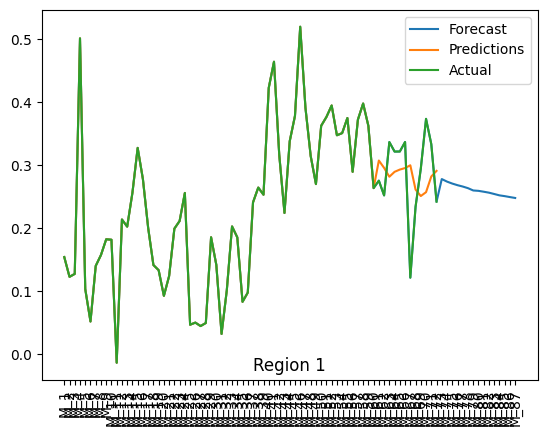

array([[0.27815778, 0.27411157, 0.27098999, 0.26842536, 0.26627567,
        0.2636805 , 0.26004377, 0.25943149, 0.25804361, 0.25653243,
        0.25443299, 0.25227088, 0.25103842, 0.24954572, 0.24813248]])

In [ ]:
fr = scaler.inverse_transform([lstm_forecast(X_test[:,:,0], Y_test[:,0], model, 12)])
preds = scaler.inverse_transform(lstm_pred(X_test, model))
plot_lstm_forecast('Region 1', df_eda, preds[:,0], fr[0])
fr

In [26]:
#statistical models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.varmax import VARMAX
import math

In [27]:
scaled_dataset.shape

(72, 1)

In [23]:
sd = pd.DataFrame(scaled_dataset)
sd.columns = ['Region 1']
sd.index = df_eda.index

In [24]:
rolmean = sd.rolling(window=12).mean()
rolstd = sd.rolling(window=12).std()
print(rolmean,rolstd)

          Region 1
Month 1        NaN
Month 2        NaN
Month 3        NaN
Month 4        NaN
Month 5        NaN
...            ...
Month 68  0.587275
Month 69  0.575141
Month 70  0.571335
Month 71  0.566810
Month 72  0.563438

[72 rows x 1 columns]           Region 1
Month 1        NaN
Month 2        NaN
Month 3        NaN
Month 4        NaN
Month 5        NaN
...            ...
Month 68  0.141658
Month 69  0.135035
Month 70  0.129529
Month 71  0.125318
Month 72  0.127232

[72 rows x 1 columns]


In [25]:
movingAverage = sd.rolling(window=12).mean()
expmovingaverage = sd.ewm(halflife=12,min_periods=0,adjust=True).mean()

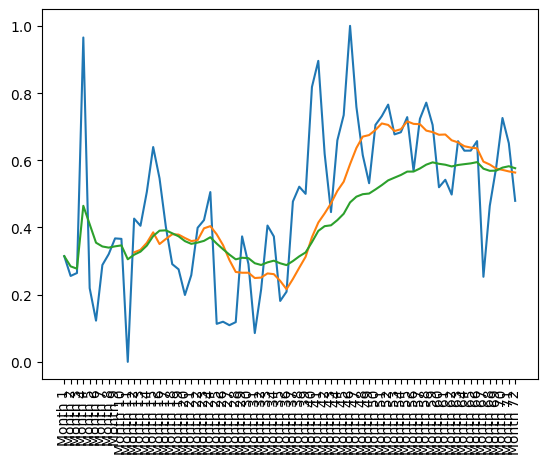

In [26]:
plt.plot(sd);
plt.plot(movingAverage);
plt.plot(expmovingaverage);
plt.xticks(rotation=90);

In [27]:
sma_12 = sd - movingAverage
sma_12d = sma_12.dropna()
sma_12.values[:,0][:11] = sd.values[:,0][:11]

ema_12 = sd - expmovingaverage
ema_12d = ema_12.dropna()
ema_12 = ema_12.fillna(df_eda['Region 1'].iloc[:11])

In [28]:
from statsmodels.tsa.stattools import adfuller
print ('Result for Dickey fuller test')
# print(indexedDataset['#Passengers'])
dftest= adfuller(sd,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value

print(dfoutput)

Result for Dickey fuller test
Test Statistic                -4.068787
p-value                        0.001090
#Lags Used                     0.000000
Number of observation Used    71.000000
Critical Value (1%)           -3.526005
Critical Value (5%)           -2.903200
Critical Value (10%)          -2.588995
dtype: float64


In [29]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingStd = timeseries.rolling(window=12).std()

    # Plot rolling
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red',label='Rolling Average')
    std = plt.plot(movingStd, color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xticks(rotation=90)
    plt.show(block=False)

    # perform Dickey Fuller Test
    print('Result of Dickey Fuller Test')
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of observation Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)

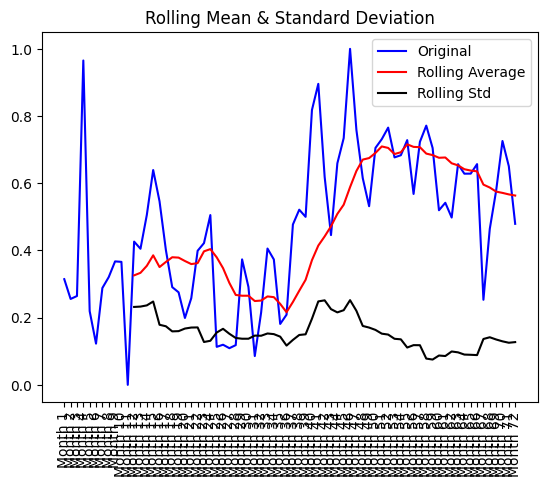

Result of Dickey Fuller Test
Test Statistic                -4.068787
p-value                        0.001090
#Lags Used                     0.000000
Number of observation Used    71.000000
Critical Value (1%)           -3.526005
Critical Value (5%)           -2.903200
Critical Value (10%)          -2.588995
dtype: float64


In [36]:
test_stationary(sd)

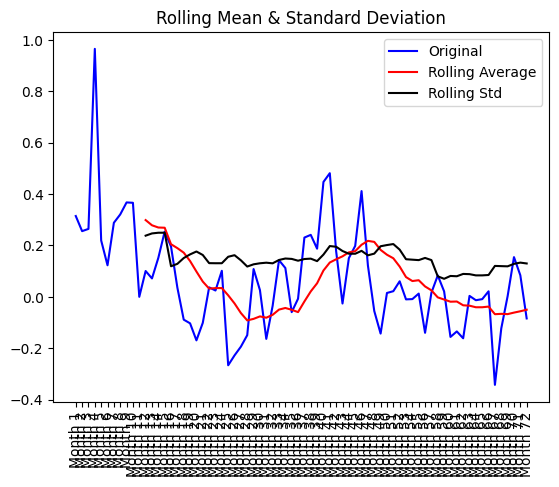

Result of Dickey Fuller Test
Test Statistic                -3.894527
p-value                        0.002075
#Lags Used                     1.000000
Number of observation Used    70.000000
Critical Value (1%)           -3.527426
Critical Value (5%)           -2.903811
Critical Value (10%)          -2.589320
dtype: float64


In [37]:
test_stationary(sma_12)

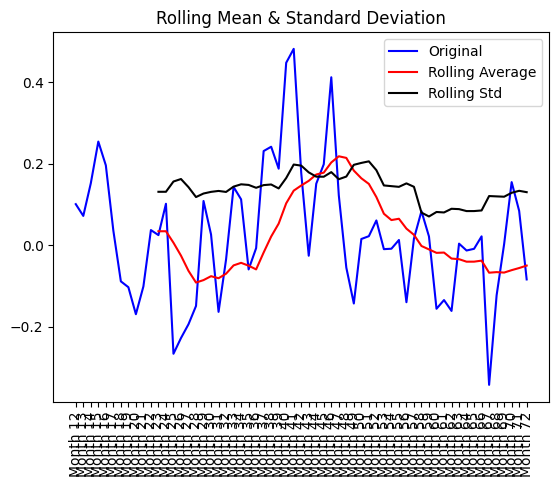

Result of Dickey Fuller Test
Test Statistic                -2.507869
p-value                        0.113571
#Lags Used                     3.000000
Number of observation Used    57.000000
Critical Value (1%)           -3.550670
Critical Value (5%)           -2.913766
Critical Value (10%)          -2.594624
dtype: float64


In [38]:
test_stationary(sma_12d)

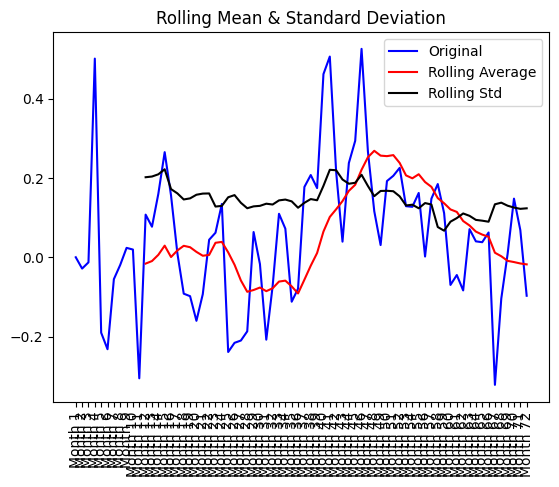

Result of Dickey Fuller Test
Test Statistic                -4.848741
p-value                        0.000044
#Lags Used                     0.000000
Number of observation Used    71.000000
Critical Value (1%)           -3.526005
Critical Value (5%)           -2.903200
Critical Value (10%)          -2.588995
dtype: float64


In [39]:
test_stationary(ema_12d)

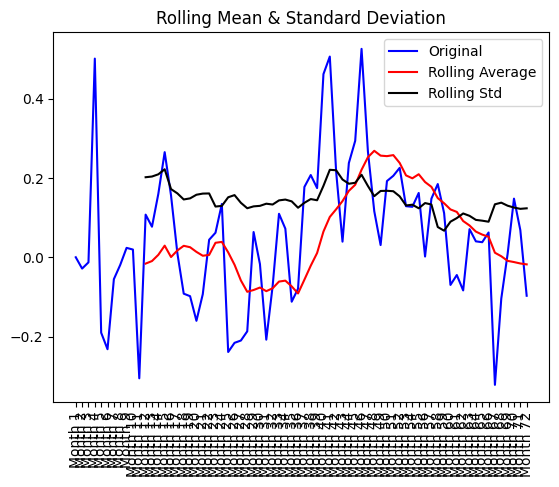

Result of Dickey Fuller Test
Test Statistic                -4.848741
p-value                        0.000044
#Lags Used                     0.000000
Number of observation Used    71.000000
Critical Value (1%)           -3.526005
Critical Value (5%)           -2.903200
Critical Value (10%)          -2.588995
dtype: float64


In [40]:
test_stationary(ema_12)

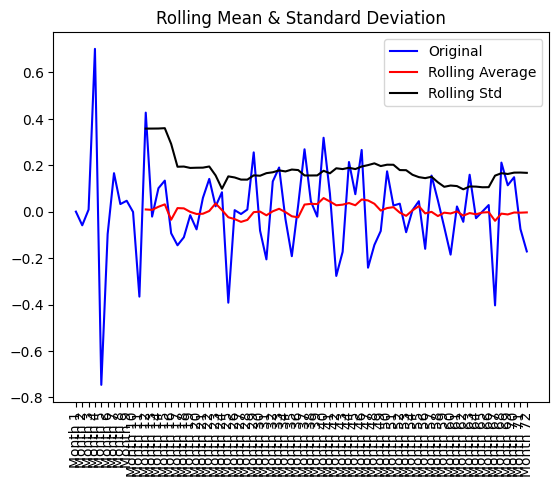

Result of Dickey Fuller Test
Test Statistic               -8.167707e+00
p-value                       8.791647e-13
#Lags Used                    3.000000e+00
Number of observation Used    6.800000e+01
Critical Value (1%)          -3.530399e+00
Critical Value (5%)          -2.905087e+00
Critical Value (10%)         -2.590001e+00
dtype: float64


In [61]:
station = (sd-sd.shift(1)).fillna(0)
test_stationary(station)

In [57]:
def arima_stationarity_lag(name, df_func, ts, lag_value):
    station = (ts-ts.shift(lag_value)).fillna(0)
    print(station)
    # AR model
    model = ARIMA(ts,order=(2, 1, 2))
    result_AR= model.fit()
    fv = result_AR.fittedvalues
    fv = pd.DataFrame(fv,columns=['Region 1'])
    fv = fv.astype('float64')
    station = station.astype('float64')
    # plt.plot(station)
    # plt.plot(fv,color='red')
    print(math.sqrt(sum((np.array(fv.values)-np.array(ts.values))**2)[0]/len(fv)))
    # plt.xticks(rotation=90);
    print('Plotting AR Model')
    # MA model
    model = ARIMA(ts,order=(2, 1, 0))
    result_MA= model.fit()
    fv = result_MA.fittedvalues
    fv = pd.DataFrame(fv,columns=['Region 1'])
    fv = fv.astype('float64')
    station = station.astype('float64')
    # plt.plot(station)
    # plt.plot(fv,color='red')
    print(math.sqrt(sum((np.array(fv.values)-np.array(ts.values))**2)[0]/len(fv)))
    # plt.xticks(rotation=90);
    print('Plotting MA Model')
    # MA model
    model = ARIMA(ts,order=(2, 1, 2))
    result_MA= model.fit()
    fv = result_MA.fittedvalues
    fv = pd.DataFrame(fv,columns=['Region 1'])
    fv = fv.astype('float64')
    station = station.astype('float64')
    # plt.plot(station)
    # plt.plot(fv,color='red')
    print(math.sqrt(sum((np.array(fv.values)-np.array(ts.values))**2)[0]/len(fv)))
    # plt.xticks(rotation=90);
    print('Plotting MA Model')
    forecasts = list(df_func[name]) + list(scaler.inverse_transform([list(result_MA.forecast(15))])[0])
    ind = list(df_func.index)
    for i in range(73, 88):
        ind.append('Month '+str(i))
    forecasts = pd.DataFrame(forecasts, index=ind)
    plt.plot(forecasts, label='forecast');
    plt.plot(df_func[name], label='present');
    plt.title('Forecast for ARIMA');
    plt.legend(loc='best');
    xt = plt.xticks()
    new_t = []
    for t in xt[1]:
        new_t.append('M_'+t.get_text().split(' ')[-1])
    plt.xticks(xt[0], new_t);
    plt.xticks(rotation=90);
    plt.show();

          Region 1
Month 1   0.000000
Month 2  -0.058896
Month 3   0.008775
Month 4   0.700927
Month 5  -0.745969
...            ...
Month 68  0.211024
Month 69  0.113433
Month 70  0.148182
Month 71 -0.075181
Month 72 -0.171431

[72 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


0.17465957995904666
Plotting AR Model
0.18607644928775185
Plotting MA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

0.17465957995904666
Plotting MA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


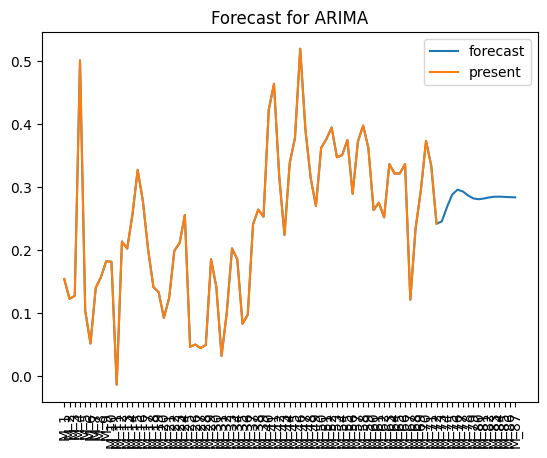

In [58]:
arima_stationarity_lag('Region 1', df_eda, sd, 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


          Region 1
Month 1   0.000000
Month 2   0.000000
Month 3  -0.050121
Month 4   0.709703
Month 5  -0.045042
...            ...
Month 68 -0.192763
Month 69  0.324457
Month 70  0.261615
Month 71  0.073001
Month 72 -0.246612

[72 rows x 1 columns]
0.17465957995904666
Plotting AR Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

0.18607644928775185
Plotting MA Model
0.17465957995904666
Plotting MA Model


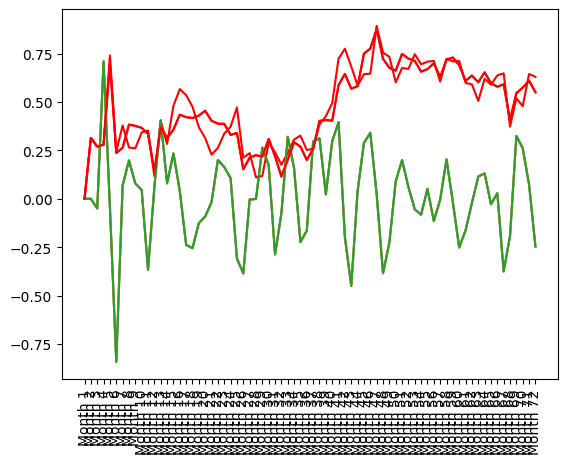

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


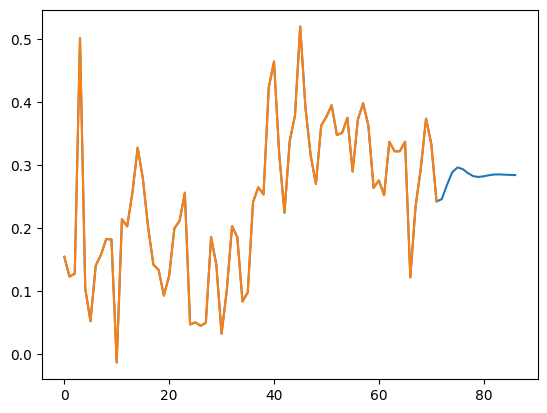

In [36]:
arima_stationarity_lag('Region 1', df_eda, sd, 2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


          Region 1
Month 1   0.000000
Month 2   0.000000
Month 3   0.000000
Month 4   0.000000
Month 5   0.000000
...            ...
Month 68 -0.103979
Month 69 -0.145606
Month 70 -0.045673
Month 71 -0.054295
Month 72 -0.040466

[72 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


0.17465957995904666
Plotting AR Model
0.18607644928775185
Plotting MA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

0.17465957995904666
Plotting MA Model


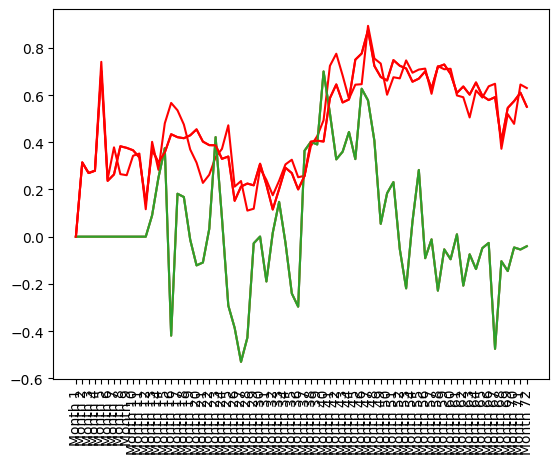

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


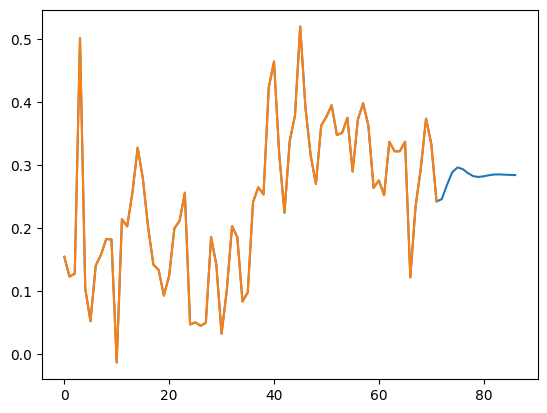

In [37]:
arima_stationarity_lag('Region 1', df_eda, sd, 12)

In [60]:
def sarimax_stationarity_lag(name, df_func, ts, lag_value):
    station = (ts-ts.shift(lag_value)).fillna(0)
    print(station)
    # AR model
    model = SARIMAX(ts,order=(2, 1, 2), seasonal_order=(2,1,2,12))
    result_AR= model.fit()
    fv = result_AR.fittedvalues
    fv = pd.DataFrame(fv,columns=['Region 1'])
    fv = fv.astype('float64')
    station = station.astype('float64')
    # plt.plot(station)
    # plt.plot(fv,color='red')
    print(math.sqrt(sum((np.array(fv.values)-np.array(ts.values))**2)[0]/len(fv)))
    # plt.xticks(rotation=90);
    print('Plotting AR Model')
    # MA model
    model = SARIMAX(ts,order=(2, 1, 0),seasonal_order=(2,1,0,12))
    result_MA= model.fit()
    fv = result_MA.fittedvalues
    fv = pd.DataFrame(fv,columns=['Region 1'])
    fv = fv.astype('float64')
    station = station.astype('float64')
    # plt.plot(station)
    # plt.plot(fv,color='red')
    print(math.sqrt(sum((np.array(fv.values)-np.array(ts.values))**2)[0]/len(fv)))
    # plt.xticks(rotation=90);
    print('Plotting MA Model')
    # MA model
    model = SARIMAX(ts,order=(2, 1, 2),seasonal_order=(2,1,2,12))
    result_MA= model.fit()
    fv = result_MA.fittedvalues
    fv = pd.DataFrame(fv,columns=['Region 1'])
    fv = fv.astype('float64')
    station = station.astype('float64')
    # plt.plot(station)
    # plt.plot(fv,color='red')
    print(math.sqrt(sum((np.array(fv.values)-np.array(ts.values))**2)[0]/len(fv)))
    # plt.xticks(rotation=90);
    print('Plotting MA Model')
    forecasts = list(df_func[name]) + list(scaler.inverse_transform([list(result_MA.forecast(15))])[0])
    ind = list(df_func.index)
    for i in range(73, 88):
        ind.append('Month '+str(i))
    forecasts = pd.DataFrame(forecasts, index=ind)
    plt.plot(forecasts, label='forecast');
    plt.plot(df_func[name], label='present');
    plt.title('Forecast for SARIMAX');
    plt.legend(loc='best');
    xt = plt.xticks()
    new_t = []
    for t in xt[1]:
        new_t.append('M_'+t.get_text().split(' ')[-1])
    plt.xticks(xt[0], new_t);
    plt.xticks(rotation=90);
    plt.show();

In [ ]:
sarimax_stationarity_lag('Region 1', df_eda, sd, 1)

          Region 1
Month 1   0.000000
Month 2  -0.058896
Month 3   0.008775
Month 4   0.700927
Month 5  -0.745969
...            ...
Month 68  0.211024
Month 69  0.113433
Month 70  0.148182
Month 71 -0.075181
Month 72 -0.171431

[72 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Valu

0.23487112896590806
Plotting AR Model
0.23885468258840356
Plotting MA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: Valu

0.23487112896590806
Plotting MA Model


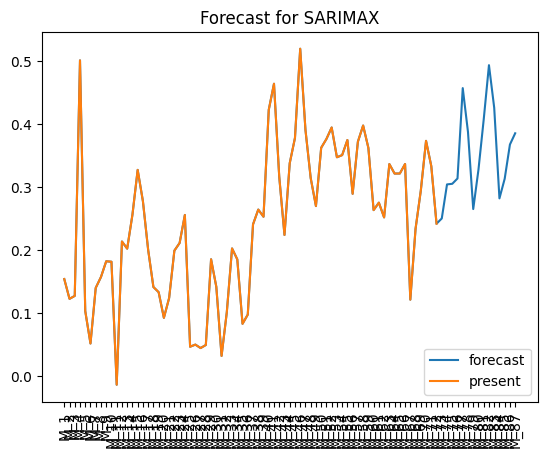

In [61]:
sarimax_stationarity_lag('Region 1', df_eda, sd, 1)

In [20]:
# multivariate
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [41]:
def var_stationarity_lag(name, df_func, lag_value):
    relevant_df = df_func[region_wise_corr(name, df_func)[1]]
    scaled_dataset = scaler.fit_transform(relevant_df)
    model = VAR(endog=scaled_dataset)
    model_fit = model.fit(lag_value)
    fv = model_fit.fittedvalues
    yhat = list(scaler.inverse_transform(model_fit.forecast(scaled_dataset, steps=15))[:,0])
    print('Plotting VAR Model')
    forecasts = list(df_func[name]) + yhat
    ind = list(df_func.index)
    for i in range(73, 88):
        ind.append('Month '+str(i))
    forecasts = pd.DataFrame(forecasts, index=ind)
    plt.plot(forecasts, label='forecast');
    plt.plot(df_func[name], label='present');
    plt.title('Forecast for VAR');
    plt.legend(loc='best');
    xt = plt.xticks()
    new_t = []
    for t in xt[1]:
        new_t.append('M_'+t.get_text().split(' ')[-1])
    plt.xticks(xt[0], new_t);
    plt.xticks(rotation=90);
    plt.show();
    return forecasts, forecasts.index

Plotting VAR Model


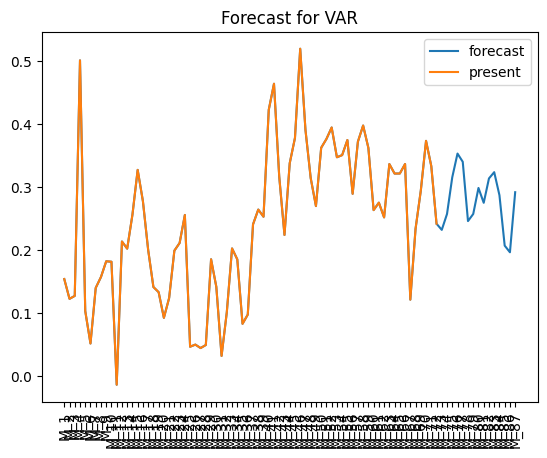

In [136]:
lfcr = []
for i in range(len(df_eda.columns)):
    fcr, ind = var_stationarity_lag(df_eda.columns[i], df_eda, 12)
    lfcr.append(fcr[0])
    break

lfcr = pd.DataFrame(lfcr, columns=df_eda.columns, index=ind)
# lfcr.to_csv('forecasts_sub.csv', index=False)

In [33]:
def var_stationarity_lag_error(name, df_func, lag_value):
    relevant_df = df_func[region_wise_corr(name, df_func)[1]]
    scaled_dataset = scaler.fit_transform(relevant_df)
    scaled_dataset_train = scaled_dataset[:60,:]
    scaled_dataset_test = scaled_dataset[60:,:]
    model = VAR(endog=scaled_dataset_train)
    model_fit = model.fit(lag_value)
    fv = model_fit.fittedvalues
    yhat = list(scaler.inverse_transform(model_fit.forecast(scaled_dataset, steps=12))[:,0])
    print(mean_squared_error(scaled_dataset_test[:,0], yhat))

In [34]:
var_stationarity_lag_error('Region 1', df_eda, 12)

0.052324226385434096


In [35]:
var_stationarity_lag_error('Region 1', df_eda, 1)

0.07502759139478506


In [38]:
var_stationarity_lag_error('Region 1', df_eda, 2)

0.04801395402884345


In [39]:
for lg in range(1, 13):
    print(var_stationarity_lag_error('Region 1', df_eda, lg))

0.07502759139478506
None
0.04801395402884345
None
0.046368858045003146
None
0.05108846657554452
None
0.05883254158148541
None
0.0632470411537476
None
0.06651759135066038
None
0.06608301876187822
None
0.0636676809569144
None
0.05969948035244765
None
0.06267691536382664
None
0.052324226385434096
None


Plotting VAR Model


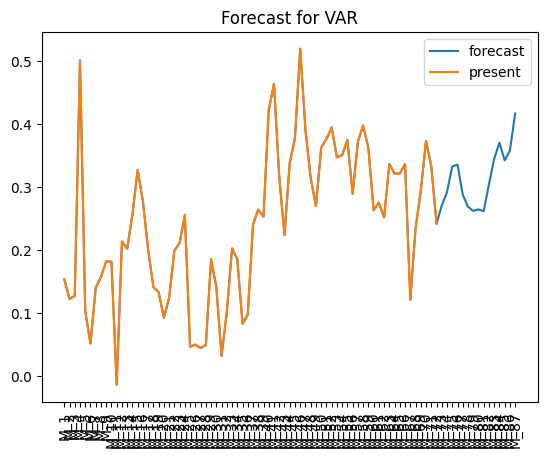

In [43]:
lfcr = []
for i in range(len(df_eda.columns)):
    fcr, ind = var_stationarity_lag(df_eda.columns[i], df_eda, 1)
    lfcr.append(fcr[0])
    break

lfcr = pd.DataFrame(lfcr, columns=df_eda.columns, index=ind)
# lfcr.to_csv('forecasts_sub.csv', index=False)

In [32]:
# univariate and multivariate techinques can be extended to each region and forecasts can be
# combined in each dataframe

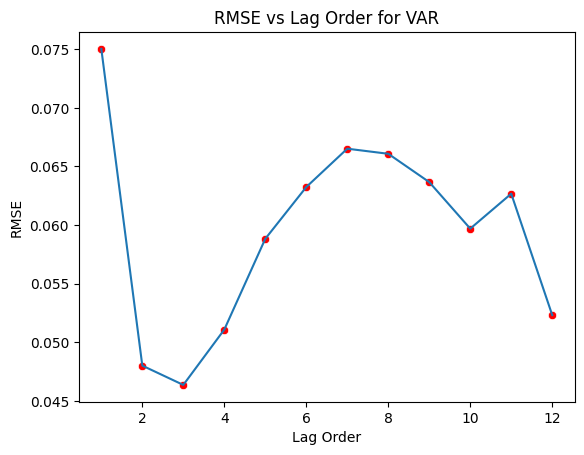

In [48]:
arr = [0.07502759139478506,
0.04801395402884345,
0.046368858045003146,
0.05108846657554452,
0.05883254158148541,
0.0632470411537476,
0.06651759135066038,
0.06608301876187822,
0.0636676809569144,
0.05969948035244765,
0.06267691536382664,
0.052324226385434096]
sns.lineplot(x=np.arange(1,13), y=arr);
sns.scatterplot(x=np.arange(1,13), y=arr, color='red');
plt.xlabel('Lag Order');
plt.ylabel('RMSE');
plt.title('RMSE vs Lag Order for VAR');